In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

In [58]:
df = pd.read_csv('sp500_with_indicators.csv')
print()
df.head

<bound method NDFrame.head of                             Date         Open         High          Low  \
0      1928-03-13 00:00:00-05:00    17.920000    17.920000    17.920000   
1      1928-03-14 00:00:00-05:00    17.930000    17.930000    17.930000   
2      1928-03-15 00:00:00-05:00    18.070000    18.070000    18.070000   
3      1928-03-16 00:00:00-05:00    18.260000    18.260000    18.260000   
4      1928-03-19 00:00:00-05:00    18.360001    18.360001    18.360001   
...                          ...          ...          ...          ...   
24188  2024-06-27 00:00:00-04:00  5473.589844  5490.810059  5467.540039   
24189  2024-06-28 00:00:00-04:00  5488.479980  5523.640137  5451.120117   
24190  2024-07-01 00:00:00-04:00  5471.080078  5479.549805  5446.529785   
24191  2024-07-02 00:00:00-04:00  5461.839844  5509.689941  5458.430176   
24192  2024-07-03 00:00:00-04:00  5507.439941  5539.270020  5507.419922   

             Close      Volume  Dividends  Stock Splits       SMA_20 

In [59]:

# Create the target variable
#adjust thereshold to make every class have similar numer of data
threshold = 0.003
df2 = df
# Create the 'Close_Next_Day' column if it doesn't exist
df2['Close_Next_Day'] = df2['Close'].shift(-1)
df2['Change'] = (df2['Close'] - df2['Close'].shift(1))/df2['Close'] #create new feature
df2['Up'] = (df2['High'] - df2['Close'])/df2['Close']
df2['Down'] = (df2['Low'] - df2['Close'])/df2['Close']
# Recreate the target variable
df2['Target'] = df2.apply(
    lambda row: 1 if (row['Close_Next_Day'] > row['Close'] * (1 + threshold)) else (
                -1 if (row['Close_Next_Day'] < row['Close'] * (1 - threshold)) else 0),
    axis=1
)

# Drop the last row as it will have NaN in the 'Close_Next_Day'
df2 = df2.dropna(subset=['Close_Next_Day'])


df2


Date         Open         High          Low  \
0      1928-03-13 00:00:00-05:00    17.920000    17.920000    17.920000   
1      1928-03-14 00:00:00-05:00    17.930000    17.930000    17.930000   
2      1928-03-15 00:00:00-05:00    18.070000    18.070000    18.070000   
3      1928-03-16 00:00:00-05:00    18.260000    18.260000    18.260000   
4      1928-03-19 00:00:00-05:00    18.360001    18.360001    18.360001   
...                          ...          ...          ...          ...   
24187  2024-06-26 00:00:00-04:00  5460.709961  5483.140137  5451.870117   
24188  2024-06-27 00:00:00-04:00  5473.589844  5490.810059  5467.540039   
24189  2024-06-28 00:00:00-04:00  5488.479980  5523.640137  5451.120117   
24190  2024-07-01 00:00:00-04:00  5471.080078  5479.549805  5446.529785   
24191  2024-07-02 00:00:00-04:00  5461.839844  5509.689941  5458.430176   

             Close      Volume  Dividends  Stock Splits       SMA_20  \
0        17.920000           0        0.0           0.0    17.402000   
1        17.930000           0        0.0           0.0    17.426500   
2        18.070000           0        0.0           0.0    17.460000   
3        18.260000           0        0.0           0.0    17.505500   
4        18.360001           0        0.0           0.0    17.571500   
...            ...         ...        ...           ...          ...   
24187  5477.899902  3563920000        0.0           0.0  5386.212964   
24188  5482.870117  3589530000        0.0           0.0  5397.008960   
24189  5460.479980  7199220000        0.0           0.0  5408.258960   
24190  5475.089844  3488760000        0.0           0.0  5418.137964   
24191  5509.009766  3329950000        0.0           0.0  5429.418457   

            SMA_50  ...       EMA_50        RSI       MACD  MACD_Signal  \
0        17.473000  ...    17.503567  65.755873   0.117815     0.028454   
1        17.478400  ...    17.520290  66.019171   0.132710     0.049306   
2        17.484600  ...    17.541847  69.549065   0.154036     0.070252   
3        17.495400  ...    17.570010  73.562862   0.184146     0.093030   
4        17.511600  ...    17.600990  75.400708   0.213615     0.117147   
...            ...  ...          ...        ...        ...          ...   
24187  5252.485400  ...  5297.355699  70.537915  61.446374    59.965972   
24188  5261.114600  ...  5304.630774  71.093672  60.552786    60.083335   
24189  5269.880000  ...  5310.742508  65.133083  57.376513    59.541970   
24190  5279.159395  ...  5317.187501  67.073005  55.399576    58.713492   
24191  5289.994990  ...  5324.709943  71.094152  55.925223    58.155838   

       MACD_Diff  Close_Next_Day    Change        Up      Down  Target  
0       0.089360       17.930000       NaN  0.000000  0.000000       0  
1       0.083405       18.070000  0.000558  0.000000  0.000000       1  
2       0.083785       18.260000  0.007748  0.000000  0.000000       1  
3       0.091115       18.360001  0.010405  0.000000  0.000000       1  
4       0.096467       18.459999  0.005447  0.000000  0.000000       1  
...          ...             ...       ...       ...       ...     ...  
24187   1.480403     5482.870117  0.001570  0.000957 -0.004752       0  
24188   0.469451     5460.479980  0.000906  0.001448 -0.002796      -1  
24189  -2.165457     5475.089844 -0.004100  0.011567 -0.001714       0  
24190  -3.313915     5509.009766  0.002668  0.000815 -0.005216       1  
24191  -2.230615     5537.020020  0.006157  0.000123 -0.009181       1  

[24192 rows x 21 columns]

In [60]:
df2['Target'].value_counts()

Target
 1    8629
 0    8072
-1    7491
Name: count, dtype: int64

In [61]:
df2['Open'].value_counts()

Open
0.000000       5075
14.700000        14
11.670000        13
14.940000        13
11.920000        13
               ... 
440.290009        1
439.029999        1
439.769989        1
439.149994        1
5461.839844       1
Name: count, Length: 13607, dtype: int64

In [62]:
df2.describe().T

count          mean           std         min           25%  \
Open            24192.0  6.132739e+02  1.036076e+03    0.000000  9.657500e+00   
High            24192.0  6.368449e+02  1.030616e+03    4.400000  2.476000e+01   
Low             24192.0  6.292158e+02  1.019025e+03    4.400000  2.476000e+01   
Close           24192.0  6.332804e+02  1.025223e+03    4.400000  2.476000e+01   
Volume          24192.0  9.057804e+08  1.617947e+09    0.000000  1.550000e+06   
Dividends       24192.0  0.000000e+00  0.000000e+00    0.000000  0.000000e+00   
Stock Splits    24192.0  0.000000e+00  0.000000e+00    0.000000  0.000000e+00   
SMA_20          24192.0  6.311426e+02  1.020577e+03    4.632000  2.474138e+01   
SMA_50          24192.0  6.278588e+02  1.013660e+03    4.880400  2.461645e+01   
EMA_20          24192.0  6.311559e+02  1.020526e+03    4.650827  2.476930e+01   
EMA_50          24192.0  6.279056e+02  1.013617e+03    5.066669  2.455372e+01   
RSI             24192.0  5.363214e+01  1.287870e+01   11.140802  4.454873e+01   
MACD            24192.0  1.545901e+00  1.330376e+01 -237.020227 -2.523629e-01   
MACD_Signal     24192.0  1.536286e+00  1.245457e+01 -198.640715 -2.253281e-01   
MACD_Diff       24192.0  9.614703e-03  4.132220e+00  -61.221101 -2.027691e-01   
Close_Next_Day  24192.0  6.335086e+02  1.025700e+03    4.400000  2.476000e+01   
Change          24191.0  1.649384e-04  1.201638e-02   -0.257339 -4.572273e-03   
Up              24192.0  4.358684e-03  6.538761e-03    0.000000  0.000000e+00   
Down            24192.0 -4.705341e-03  6.280798e-03   -0.101614 -7.290977e-03   
Target          24192.0  4.704034e-02  8.149544e-01   -1.000000 -1.000000e+00   

                         50%           75%           max  
Open            4.291500e+01  1.027560e+03  5.499990e+03  
High            1.031600e+02  1.034517e+03  5.523640e+03  
Low             1.014950e+02  1.018625e+03  5.471320e+03  
Close           1.023100e+02  1.027977e+03  5.509010e+03  
Volume          2.042500e+07  9.752000e+08  1.145623e+10  
Dividends       0.000000e+00  0.000000e+00  0.000000e+00  
Stock Splits    0.000000e+00  0.000000e+00  0.000000e+00  
SMA_20          1.021317e+02  1.024351e+03  5.429418e+03  
SMA_50          1.020256e+02  1.030450e+03  5.289995e+03  
EMA_20          1.023641e+02  1.029982e+03  5.427622e+03  
EMA_50          1.019200e+02  1.028846e+03  5.324710e+03  
RSI             5.410805e+01  6.324095e+01  9.002835e+01  
MACD            1.692866e-01  1.630036e+00  9.258371e+01  
MACD_Signal     1.651255e-01  1.568759e+00  8.188411e+01  
MACD_Diff       5.590668e-03  2.141937e-01  6.089580e+01  
Close_Next_Day  1.023100e+02  1.028015e+03  5.537020e+03  
Change          4.847606e-04  5.434429e-03  1.424376e-01  
Up              1.744232e-03  6.796872e-03  2.573386e-01  
Down           -2.897253e-03  0.000000e+00  0.000000e+00  
Target          0.000000e+00  1.000000e+00  1.000000e+00

In [63]:
# Drop rows where Volume is 0
df3 = df2[(df2['Volume'] != 0) & (df2['Up'] != 0) & (df2['Down'] != 0)]
df3 = df3.drop(columns=['Open', 'Date','Dividends', 'Stock Splits', 'Close_Next_Day'], axis=1)
# df3 = df3.reset_index(drop=True)
# Check the shape of the df2 to ensure rows with Volume = 0 are dropped
df3.shape


(14884, 16)

In [64]:
df3

High          Low        Close      Volume       SMA_20  \
8460     71.959999    70.709999    70.959999     3120000    71.700001   
8461     71.480003    70.379997    71.129997     3590000    71.656001   
8462     71.620003    70.449997    70.639999     4450000    71.591500   
8463     70.839996    69.349998    69.660004     4630000    71.475001   
8464     69.839996    68.169998    69.120003     4620000    71.346001   
...            ...          ...          ...         ...          ...   
24187  5483.140137  5451.870117  5477.899902  3563920000  5386.212964   
24188  5490.810059  5467.540039  5482.870117  3589530000  5397.008960   
24189  5523.640137  5451.120117  5460.479980  7199220000  5408.258960   
24190  5479.549805  5446.529785  5475.089844  3488760000  5418.137964   
24191  5509.689941  5458.430176  5509.009766  3329950000  5429.418457   

            SMA_50       EMA_20       EMA_50        RSI       MACD  \
8460     70.839600    71.451040    70.754064  43.966599   0.053701   
8461     70.893200    71.420464    70.768807  46.740876   0.026092   
8462     70.946000    71.346134    70.763755  40.514343  -0.034925   
8463     70.978000    71.185550    70.720471  31.481580  -0.160508   
8464     71.000800    70.988831    70.657707  27.803163  -0.300148   
...            ...          ...          ...        ...        ...   
24187  5252.485400  5400.312479  5297.355699  70.537915  61.446374   
24188  5261.114600  5408.175111  5304.630774  71.093672  60.552786   
24189  5269.880000  5413.156527  5310.742508  65.133083  57.376513   
24190  5279.159395  5419.054938  5317.187501  67.073005  55.399576   
24191  5289.994990  5427.622065  5324.709943  71.094152  55.925223   

       MACD_Signal  MACD_Diff    Change        Up      Down  Target  
8460      0.189011  -0.135310 -0.008315  0.014092 -0.003523       0  
8461      0.156427  -0.130335  0.002390  0.004921 -0.010544      -1  
8462      0.118157  -0.153082 -0.006937  0.013873 -0.002690      -1  
8463      0.062424  -0.222932 -0.014068  0.016939 -0.004450      -1  
8464     -0.010090  -0.290057 -0.007813  0.010417 -0.013744       0  
...            ...        ...       ...       ...       ...     ...  
24187    59.965972   1.480403  0.001570  0.000957 -0.004752       0  
24188    60.083335   0.469451  0.000906  0.001448 -0.002796      -1  
24189    59.541970  -2.165457 -0.004100  0.011567 -0.001714       0  
24190    58.713492  -3.313915  0.002668  0.000815 -0.005216       1  
24191    58.155838  -2.230615  0.006157  0.000123 -0.009181       1  

[14884 rows x 16 columns]

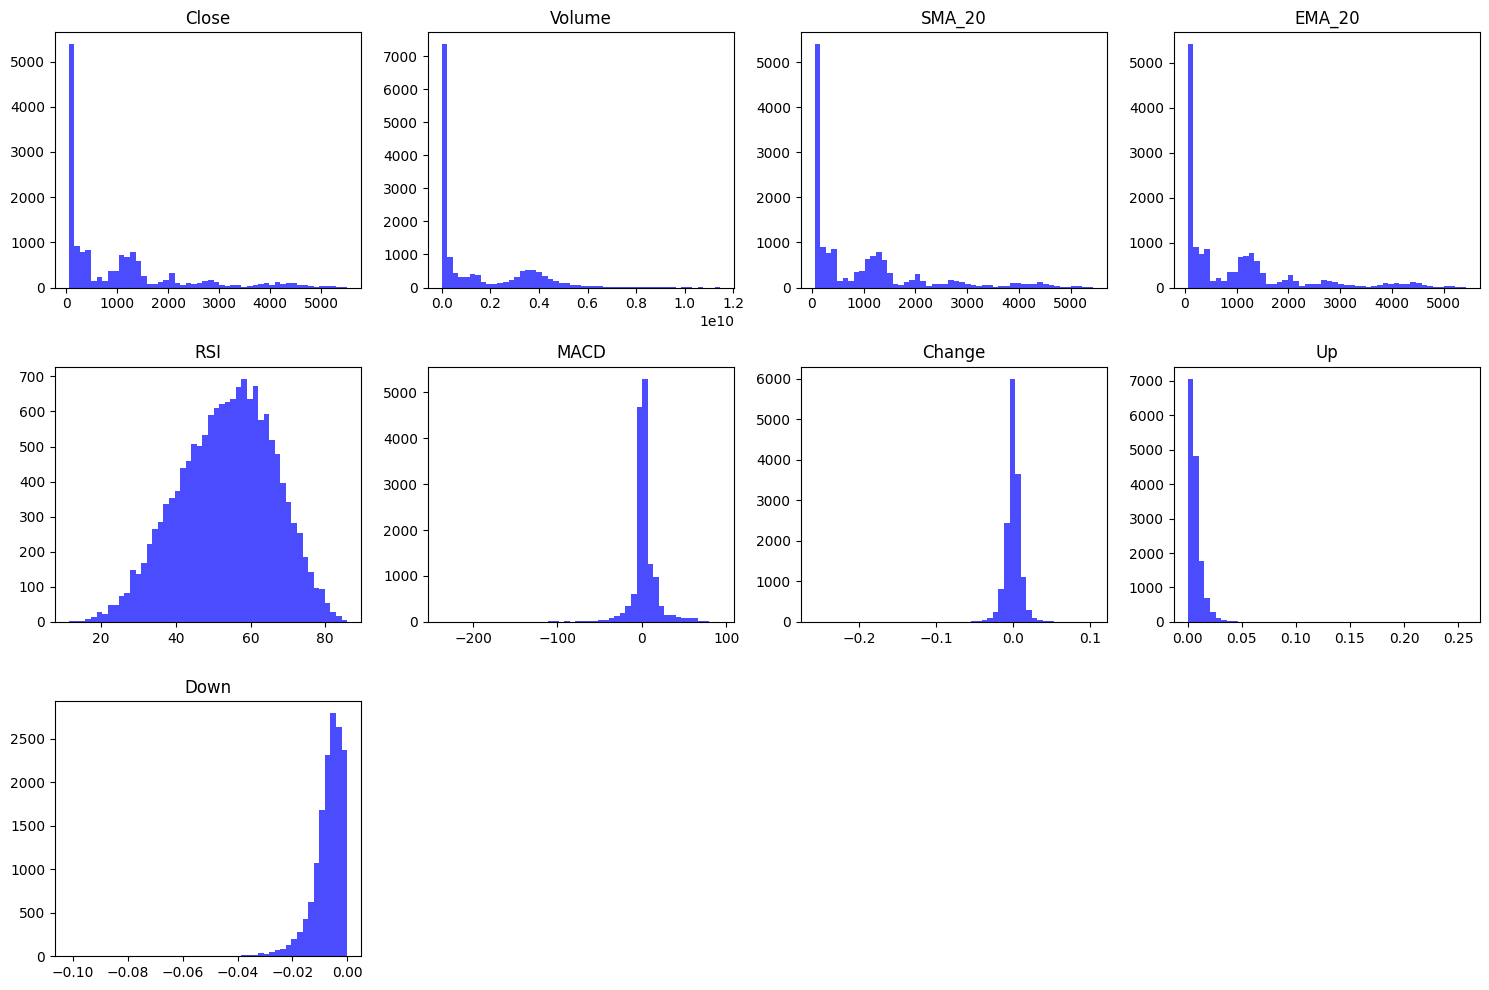

In [65]:
# Plot histograms for selected features
features_to_plot = [ 'Close', 'Volume', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Change', 'Up', 'Down']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 4, i)
    plt.hist(df3[feature], bins=50, alpha=0.7, color='blue')
    plt.title(feature)

plt.tight_layout()
plt.show()

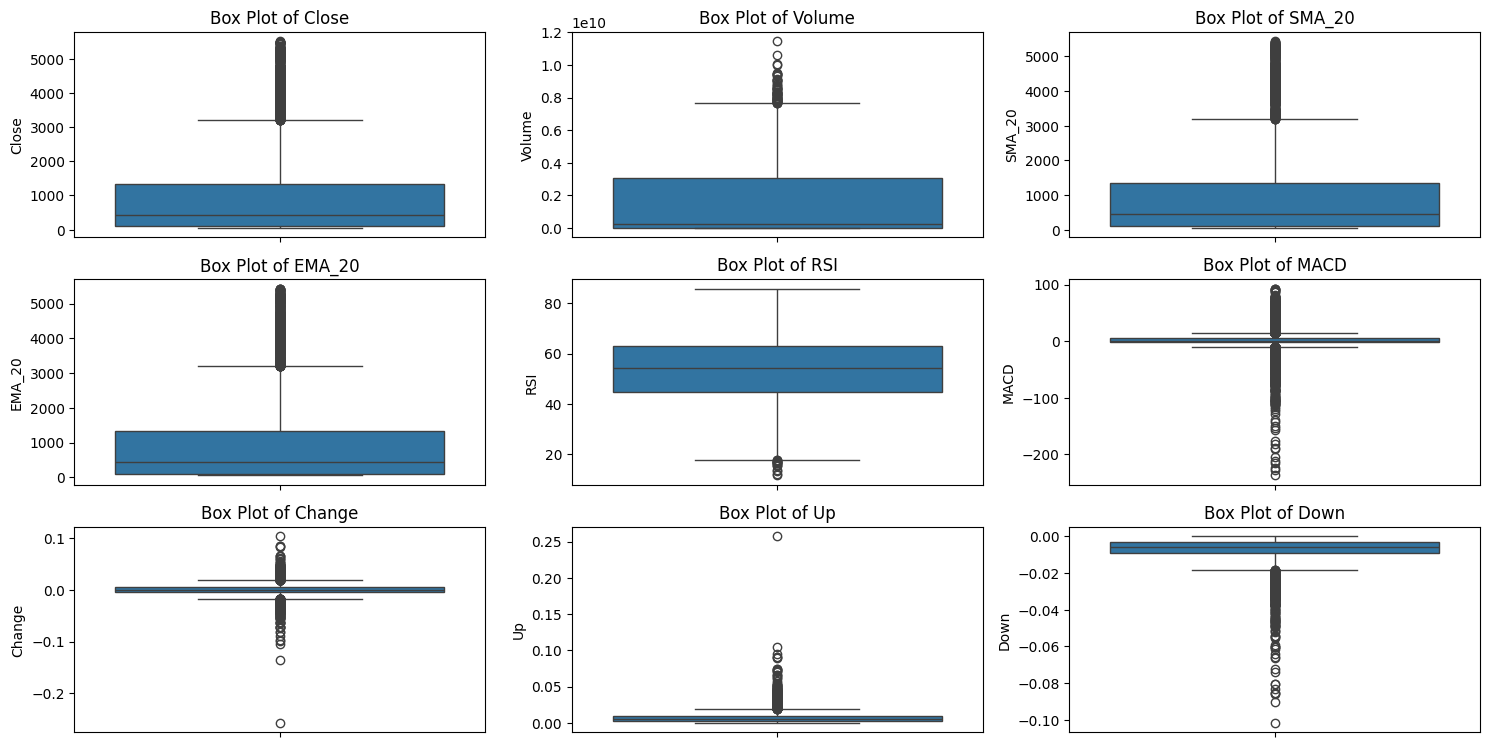

In [66]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the grid to fit all plots
    sns.boxplot(y=df3[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

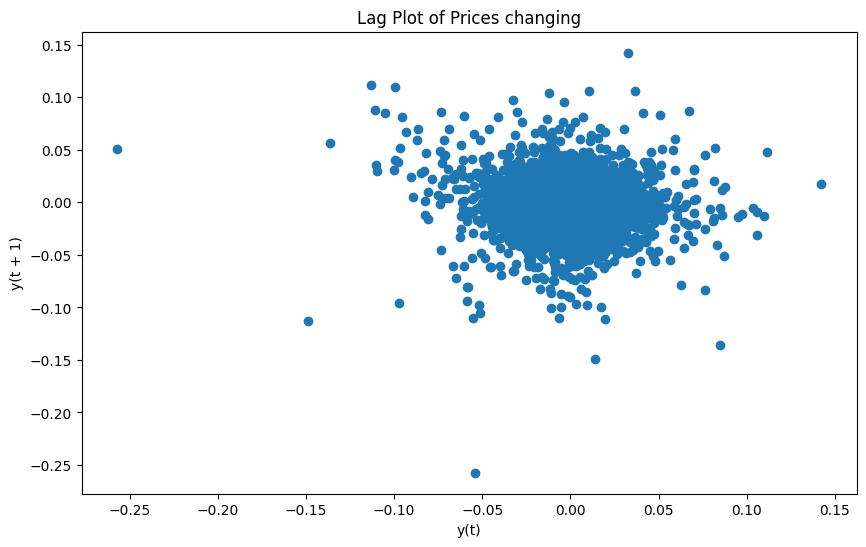

In [67]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 6))
lag_plot(df2['Change'])
plt.title('Lag Plot of Prices changing')
plt.show()

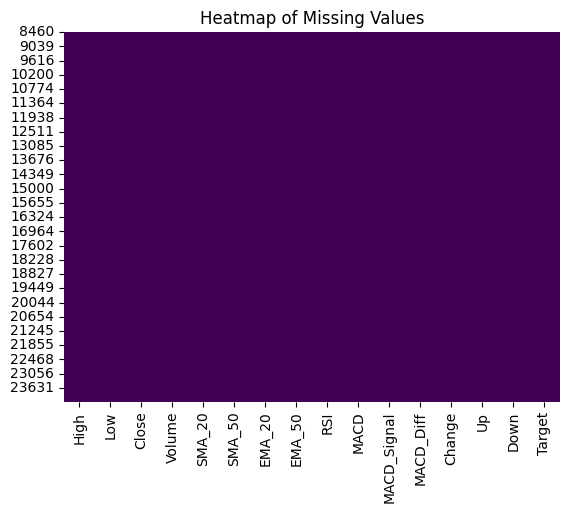

In [30]:
sns.heatmap(df3.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


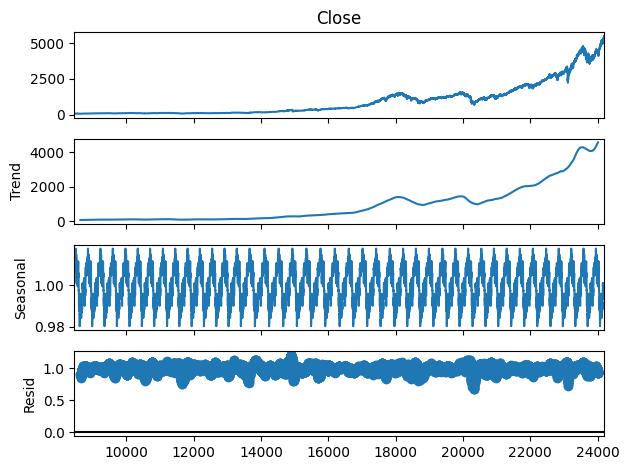

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df3['Close'], model='multiplicative', period=365)

# Plot the seasonal decomposition
result.plot()
plt.show()

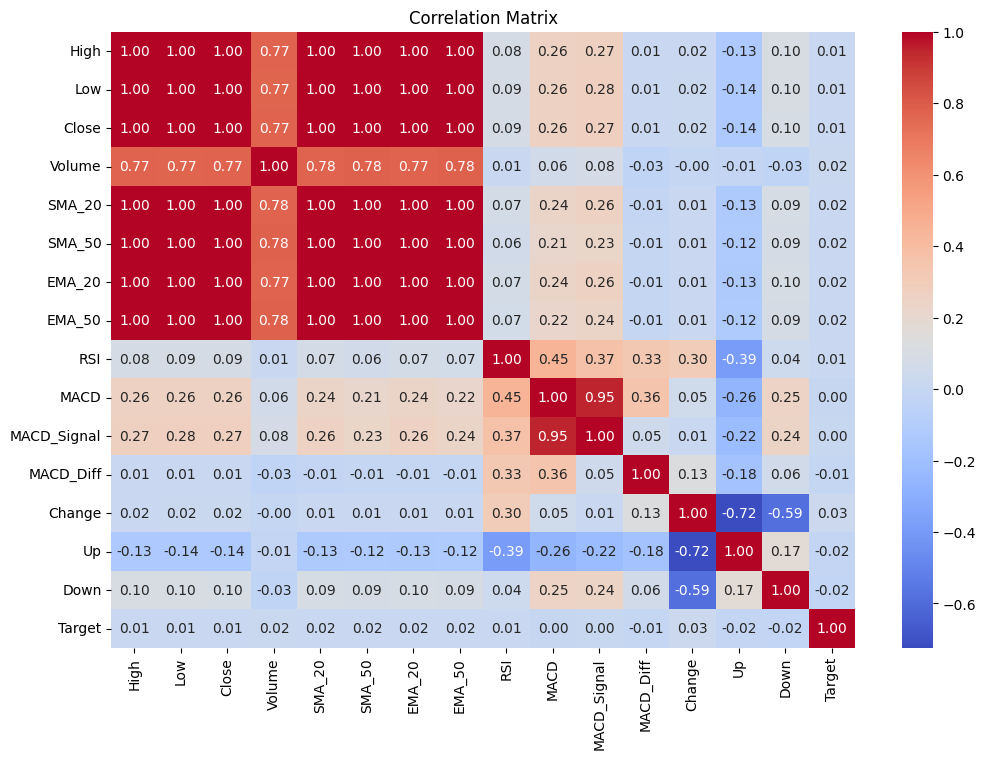

In [32]:
# Correlation matrix

correlation_matrix = df3.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [33]:
df3['Target'].value_counts()

Target
 1    5223
 0    5136
-1    4525
Name: count, dtype: int64

KeyboardInterrupt: 

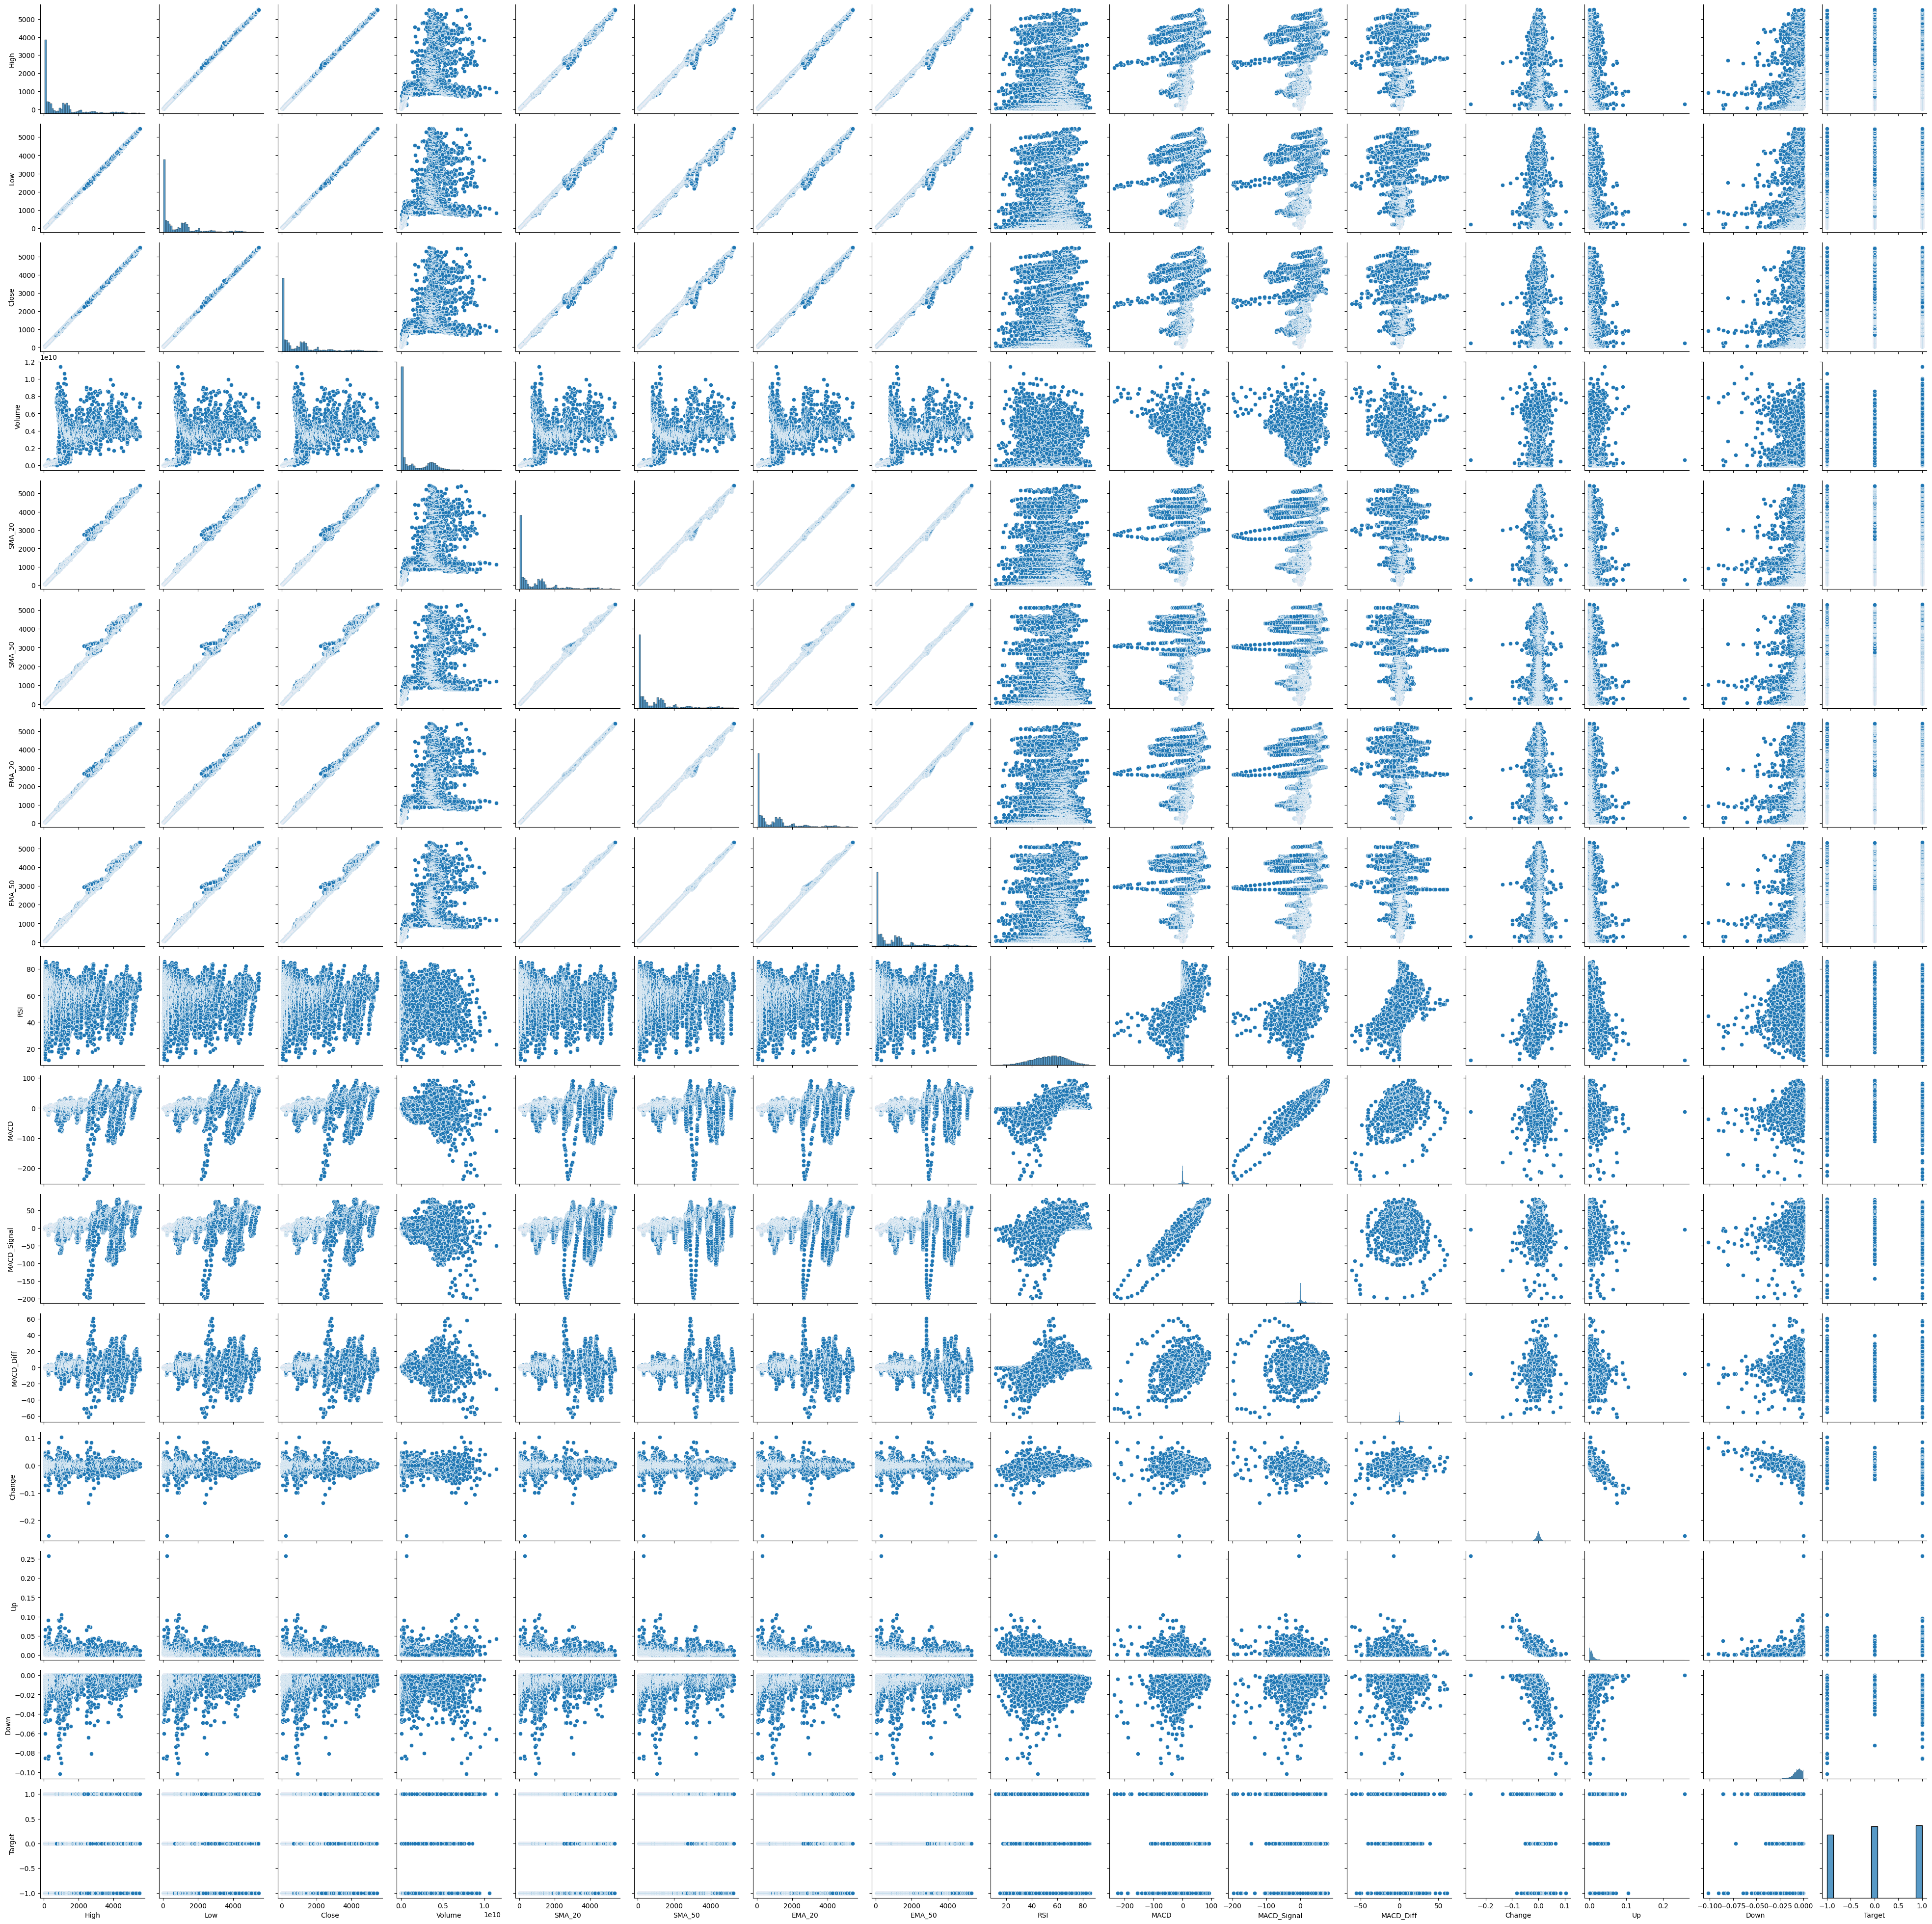

In [34]:
sns.pairplot(df3)

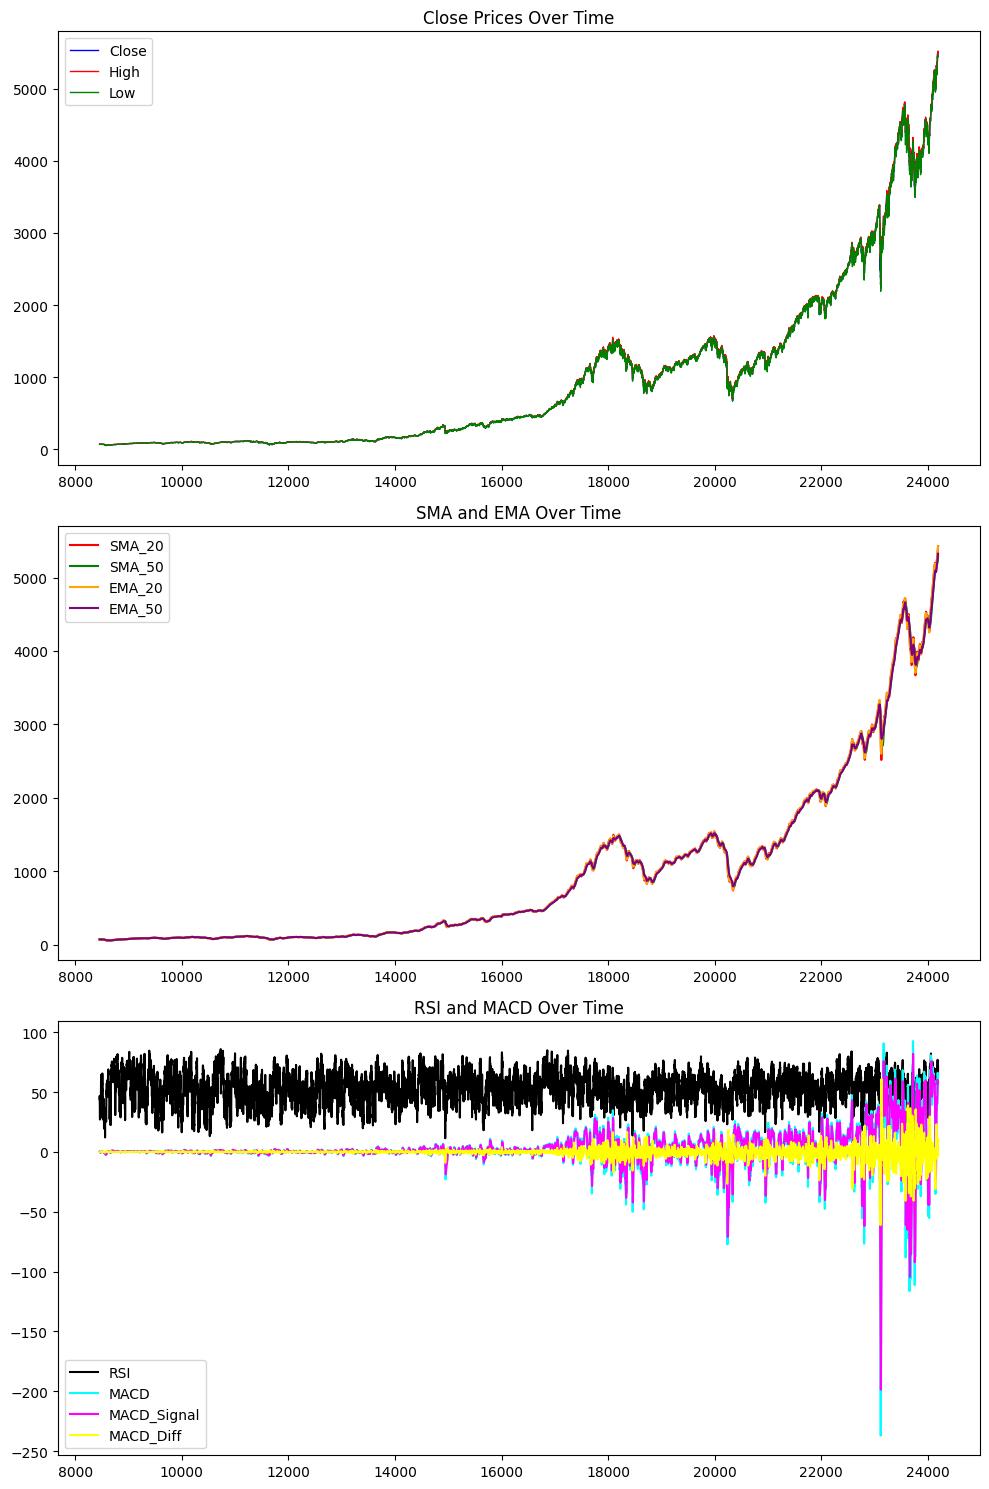

In [ ]:
data = df3
# Plot time series of stock prices and key indicators
plt.figure(figsize=(10,15))

# Close prices
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Close'], label='Close', color='blue',linewidth=1)
plt.plot(data.index, data['High'], label='High', color='red',linewidth=1)
plt.plot(data.index, data['Low'], label='Low', color='green',linewidth=1)
plt.title('Close Prices Over Time')
plt.legend()

# SMA and EMA
plt.subplot(3, 1, 2)
plt.plot(data.index, data['SMA_20'], label='SMA_20', color='red')
plt.plot(data.index, data['SMA_50'], label='SMA_50', color='green')
plt.plot(data.index, data['EMA_20'], label='EMA_20', color='orange')
plt.plot(data.index, data['EMA_50'], label='EMA_50', color='purple')
plt.title('SMA and EMA Over Time')
plt.legend()

# RSI and MACD
plt.subplot(3, 1, 3)
plt.plot(data.index, data['RSI'], label='RSI', color='black')
plt.plot(data.index, data['MACD'], label='MACD', color='cyan')
plt.plot(data.index, data['MACD_Signal'], label='MACD_Signal', color='magenta')
plt.plot(data.index, data['MACD_Diff'], label='MACD_Diff', color='yellow')
plt.title('RSI and MACD Over Time')
plt.legend()

plt.tight_layout()
plt.show()


try rolling windows

In [ ]:
# Define the list of window sizes
window_sizes = [5, 10, 15, 20]  # you can adjust this list as needed

# Initialize a list to store DataFrames for each window size
rolling_features_dfs = []

# Loop over the different window sizes
for window_size in window_sizes:
    # Initialize lists to store rolling features and targets for the current window size
    rolling_features = []
    rolling_targets = []
    
    # Loop over the data to create rolling window features
    for i in range(window_size, len(df3)):
        # Create the rolling window for the past window_size days
        rolling_window = df3.iloc[i-window_size:i][['Volume', 'SMA_20',  'EMA_20', 'RSI', 'MACD', 'MACD_Signal', 'Up', 'Down', 'Change']].values.flatten()
        
        # Append the rolling window features to the list
        rolling_features.append(rolling_window)
        
        # Append the target variable for the current day to the list
        rolling_targets.append(df3.iloc[i]['Target'])  # Corrected to get the target for the current day

    # Convert the lists to numpy arrays
    rolling_features = np.array(rolling_features)
    rolling_targets = np.array(rolling_targets)

    # Generate column names for the rolling features
    columns = []
    for j in range(window_size):
        for feature in ['Volume', 'SMA_20',  'EMA_20', 'RSI', 'MACD', 'MACD_Signal', 'Up', 'Down', 'Change']:
            columns.append(f'{feature}_t-{window_size-j-1}')  # Corrected to get proper column names

    # Convert rolling features to a DataFrame
    rolling_features_df = pd.DataFrame(rolling_features, columns=columns)

    # Add the target variable to the rolling features DataFrame
    rolling_features_df['Target'] = rolling_targets

    # Append the DataFrame to the list
    rolling_features_dfs.append(rolling_features_df)

# Example: Display the first few rows of the DataFrame for window size 5
rolling_features_dfs[0].head()


Volume_t-4  SMA_20_t-4  EMA_20_t-4    RSI_t-4  MACD_t-4  MACD_Signal_t-4  \
0   3120000.0   71.700001   71.451040  43.966599  0.053701         0.189011   
1   3590000.0   71.656001   71.420464  46.740876  0.026092         0.156427   
2   4450000.0   71.591500   71.346134  40.514343 -0.034925         0.118157   
3   4630000.0   71.475001   71.185550  31.481580 -0.160508         0.062424   
4   4620000.0   71.346001   70.988831  27.803163 -0.300148        -0.010090   

     Up_t-4  Down_t-4  Change_t-4  Volume_t-3  ...  Volume_t-0  SMA_20_t-0  \
0  0.014092 -0.003523   -0.008315   3590000.0  ...   4620000.0   71.346001   
1  0.004921 -0.010544    0.002390   4450000.0  ...   3600000.0   71.201501   
2  0.013873 -0.002690   -0.006937   4630000.0  ...   3300000.0   71.030001   
3  0.016939 -0.004450   -0.014068   4620000.0  ...   3390000.0   70.866501   
4  0.010417 -0.013744   -0.007813   3600000.0  ...   3730000.0   70.720501   

   EMA_20_t-0    RSI_t-0  MACD_t-0  MACD_Signal_t-0    Up_t-0  Down_t-0  \
0   70.988831  27.803163 -0.300148        -0.010090  0.010417 -0.013744   
1   70.813705  28.304340 -0.403738        -0.088820  0.011280 -0.004628   
2   70.637161  27.024738 -0.495455        -0.170147  0.008991 -0.004930   
3   70.516480  33.962589 -0.528960        -0.241910  0.002451 -0.011532   
4   70.430148  37.696518 -0.530036        -0.299535  0.008045 -0.005459   

   Change_t-0  Target  
0   -0.007813     0.0  
1    0.000434     1.0  
2   -0.002755     1.0  
3    0.005910     0.0  
4    0.003448    -1.0  

[5 rows x 46 columns]

In [ ]:
import tensorflow as tf

# Check if TensorFlow can see the GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs detected:")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs detected")


No GPUs detected


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.feature_selection import RFECV
from imblearn.pipeline import Pipeline as imbpipeline
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
class multiple_training2():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.methods = []
        self.models = []
        self.feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

    def report(self):
        for num, model in enumerate(self.models):
            print(self.methods[num])
            ypred = model.predict(self.X_test)

            # Classification report
            print(classification_report(self.y_test, ypred))

            # Confusion matrix
            cf_matrix = confusion_matrix(self.y_test, ypred)
            plt.figure(figsize=(5, 3))
            sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 15}, cmap="Spectral")
            plt.ylabel('True')
            plt.xlabel('Predicted')
            plt.show()
            
            
            
    def plot_learning_curve(self, estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")

        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()
    
    def run(self):
        self.methods = [method for method in dir(self) if callable(getattr(self, method)) and method.startswith("model")]
        print(self.methods)
        self.models = [getattr(self, method_name)() for method_name in self.methods]

    def plot_all_learning_curves(self):
        for num, model in enumerate(self.models):
            self.plot_learning_curve(model.best_estimator_, f"Learning Curve for {self.methods[num]}", self.X_train, self.y_train, cv=5, n_jobs=-1)

    def model_Logistic(self):
        pipe_Logistic = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(f_classif, k=20)),  # Select top 20 features based on ANOVA F-test
            ('Logistic', LogisticRegression(random_state=2024, max_iter=2000, solver='lbfgs'))
        ])
        grid_params_Logistic = {'Logistic__C': [1, 2, 4], 'Logistic__solver': ['newton-cg', 'lbfgs']}
        self.CV_Logistic = GridSearchCV(estimator=pipe_Logistic, param_grid=grid_params_Logistic, cv=5, scoring='f1_macro', verbose=1, n_jobs=1)
        self.CV_Logistic.fit(self.X_train, self.y_train)
        return self.CV_Logistic

    def model_KNN(self):
        pipe_KNNclass = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(score_func=f_classif, k='all')),  # Use SelectKBest for feature selection
            ('KNNclass', KNeighborsClassifier())
        ])
        grid_params_KNNclass = {'KNNclass__n_neighbors': [i for i in range(1, 7)]}
        self.CV_KNNclass = GridSearchCV(estimator=pipe_KNNclass, param_grid=grid_params_KNNclass, cv=5, scoring='f1_macro', verbose=1)
        self.CV_KNNclass.fit(self.X_train, self.y_train)
        print(f"Best k for KNN: {self.CV_KNNclass.best_params_['KNNclass__n_neighbors']}")
        return self.CV_KNNclass
    def model_DecisionTree(self):
        pipe_DT = imbpipeline([
            ('scaler', StandardScaler()),
            ('DT', DecisionTreeClassifier(random_state=2024))
        ])
        grid_params_DT = {'DT__max_depth': [None, 10, 20, 30], 'DT__min_samples_split': [2, 5, 10]}
        self.CV_DT = GridSearchCV(estimator=pipe_DT, param_grid=grid_params_DT, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
        self.CV_DT.fit(self.X_train, self.y_train)
        return self.CV_DT

    # def model_SVC(self): #SVC take so much time to run
    #     pipe_SVC = imbpipeline([
    #         ('scaler', StandardScaler()),
    #         ('feature_selection', RFECV(estimator=SVC(kernel='linear'), step=1, cv=5, scoring='f1_macro')),
    #         ('pca', PCA(n_components=30)),  # Reduce dimensionality
    #         ('SVC', SVC(max_iter=10000))  # Further increased max_iter
    #     ])
    #     grid_params_SVC = {'SVC__C': [0.1, 1, 10], 'SVC__kernel': ['linear', 'rbf', 'poly']}
    #     self.CV_SVC = GridSearchCV(estimator=pipe_SVC, param_grid=grid_params_SVC, cv=3, scoring='f1_macro', verbose=1)
    #     self.CV_SVC.fit(self.X_train, self.y_train)
    #     return self.CV_SVC
    # def model_RandomForest(self): #This model also take too much time to train so drop
    #     pipe_RandomForest = imbpipeline([
    #         ('scaler', StandardScaler()),
    #         ('feature_selection', RFECV(estimator=RandomForestClassifier(), step=1, cv=5, scoring='f1_macro')),
    #         ('RandomForest', RandomForestClassifier(random_state=2024))
    #     ])
    #     grid_params_RandomForest = {'RandomForest__n_estimators': [100, 200, 300], 'RandomForest__max_depth': [None, 10, 20, 30]}
    #     self.CV_RandomForest = GridSearchCV(estimator=pipe_RandomForest, param_grid=grid_params_RandomForest, cv=5, scoring='f1_macro', verbose=1)
    #     self.CV_RandomForest.fit(self.X_train, self.y_train)
    #     return self.CV_RandomForest

    # def model_GradientBoosting(self):
    #     pipe_GradientBoosting = imbpipeline([
    #         ('scaler', StandardScaler()),
    #         ('feature_selection', RFECV(estimator=GradientBoostingClassifier(random_state=2024), step=1, cv=5, scoring='f1_macro')),
    #         ('GradientBoosting', GradientBoostingClassifier(random_state=2024))
    #     ])
    #     grid_params_GradientBoosting = {'GradientBoosting__n_estimators': [100, 200, 300], 'GradientBoosting__learning_rate': [0.01, 0.1, 0.2], 'GradientBoosting__max_depth': [3, 5, 7]}
    #     self.CV_GradientBoosting = GridSearchCV(estimator=pipe_GradientBoosting, param_grid=grid_params_GradientBoosting, cv=5, scoring='f1_macro', verbose=1)
    #     self.CV_GradientBoosting.fit(self.X_train, self.y_train)
    #     return self.CV_GradientBoosting

now training windows sizes = 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Volume_t-4       14876 non-null  float64
 1   SMA_20_t-4       14876 non-null  float64
 2   EMA_20_t-4       14876 non-null  float64
 3   RSI_t-4          14876 non-null  float64
 4   MACD_t-4         14876 non-null  float64
 5   MACD_Signal_t-4  14876 non-null  float64
 6   Up_t-4           14876 non-null  float64
 7   Down_t-4         14876 non-null  float64
 8   Change_t-4       14876 non-null  float64
 9   Volume_t-3       14876 non-null  float64
 10  SMA_20_t-3       14876 non-null  float64
 11  EMA_20_t-3       14876 non-null  float64
 12  RSI_t-3          14876 non-null  float64
 13  MACD_t-3         14876 non-null  float64
 14  MACD_Signal_t-3  14876 non-null  float64
 15  Up_t-3           14876 non-null  float64
 16  Down_t-3         14876 non-

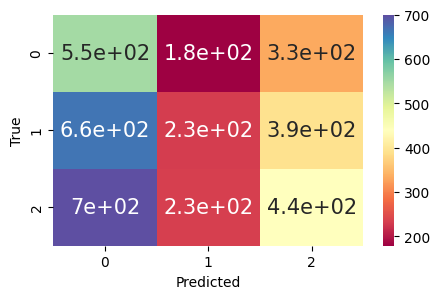

model_KNN
              precision    recall  f1-score   support

          -1       0.29      0.40      0.34      1059
           0       0.35      0.25      0.29      1286
           1       0.37      0.36      0.37      1373

    accuracy                           0.34      3718
   macro avg       0.34      0.34      0.33      3718
weighted avg       0.34      0.34      0.33      3718



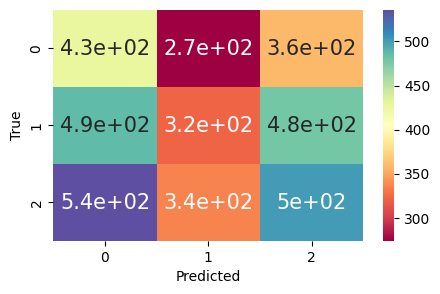

model_Logistic
              precision    recall  f1-score   support

          -1       0.30      0.21      0.24      1059
           0       0.41      0.09      0.15      1286
           1       0.36      0.71      0.48      1373

    accuracy                           0.35      3718
   macro avg       0.36      0.34      0.29      3718
weighted avg       0.36      0.35      0.30      3718



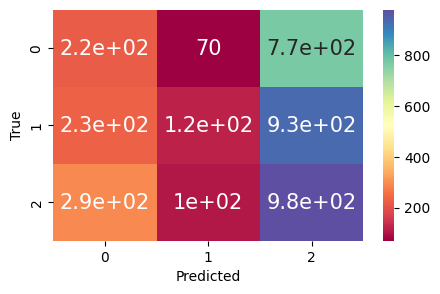

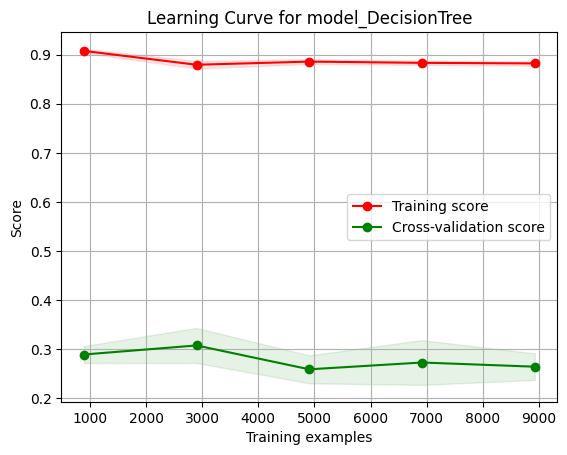

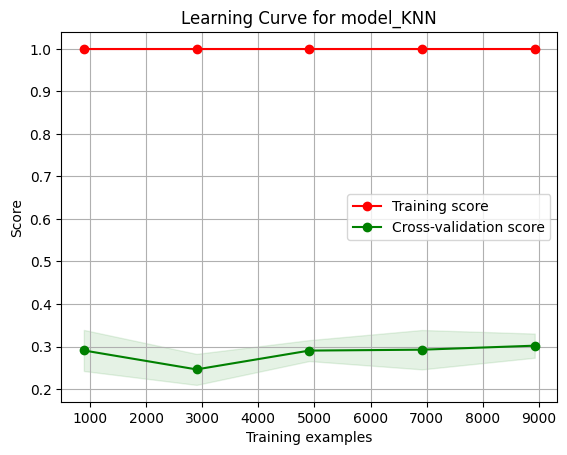

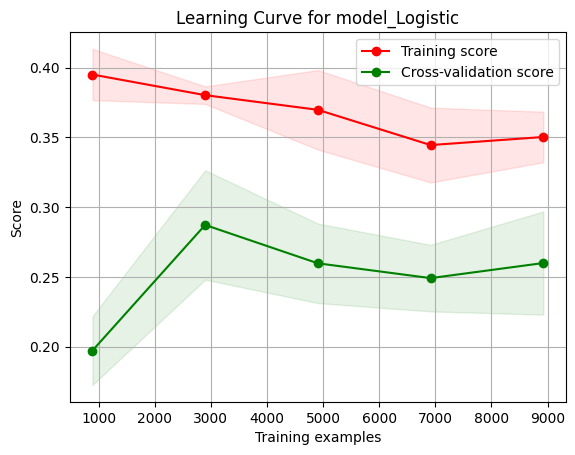

now training windows sizes = 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14871 entries, 0 to 14870
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Volume_t-9       14871 non-null  float64
 1   SMA_20_t-9       14871 non-null  float64
 2   EMA_20_t-9       14871 non-null  float64
 3   RSI_t-9          14871 non-null  float64
 4   MACD_t-9         14871 non-null  float64
 5   MACD_Signal_t-9  14871 non-null  float64
 6   Up_t-9           14871 non-null  float64
 7   Down_t-9         14871 non-null  float64
 8   Change_t-9       14871 non-null  float64
 9   Volume_t-8       14871 non-null  float64
 10  SMA_20_t-8       14871 non-null  float64
 11  EMA_20_t-8       14871 non-null  float64
 12  RSI_t-8          14871 non-null  float64
 13  MACD_t-8         14871 non-null  float64
 14  MACD_Signal_t-8  14871 non-null  float64
 15  Up_t-8           14871 non-null  float64
 16  Down_t-8         14871 non

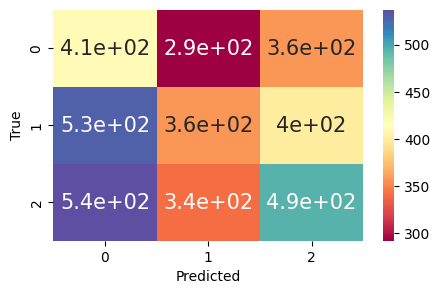

model_KNN
              precision    recall  f1-score   support

          -1       0.31      0.36      0.33      1059
           0       0.37      0.32      0.35      1286
           1       0.39      0.39      0.39      1372

    accuracy                           0.36      3717
   macro avg       0.36      0.36      0.36      3717
weighted avg       0.36      0.36      0.36      3717



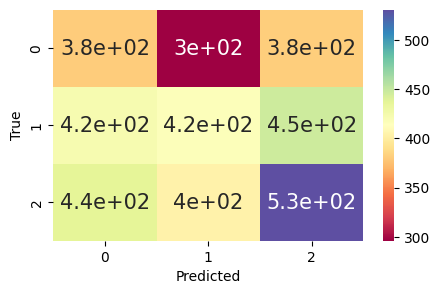

model_Logistic
              precision    recall  f1-score   support

          -1       0.31      0.27      0.29      1059
           0       0.40      0.08      0.13      1286
           1       0.36      0.67      0.47      1372

    accuracy                           0.35      3717
   macro avg       0.36      0.34      0.30      3717
weighted avg       0.36      0.35      0.30      3717



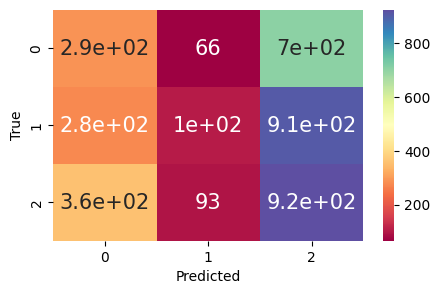

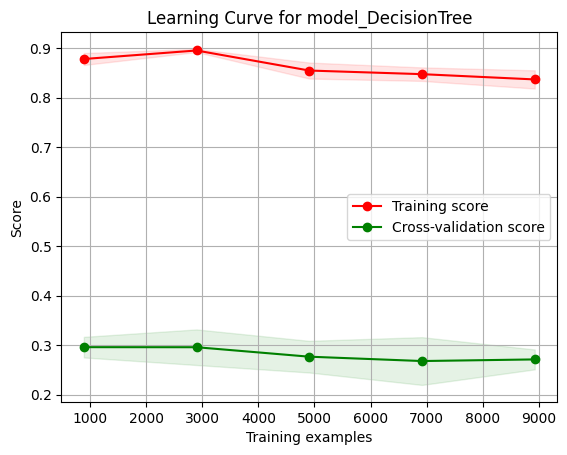

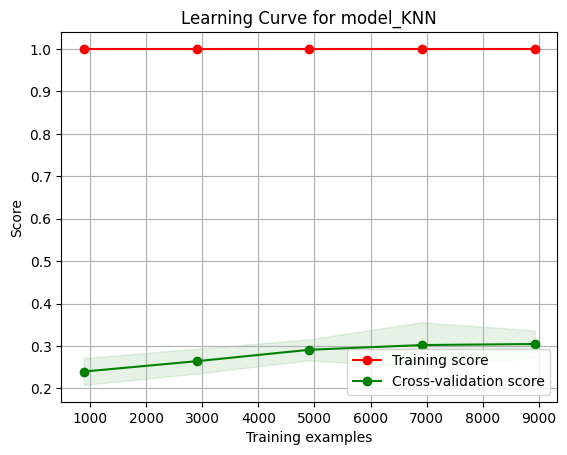

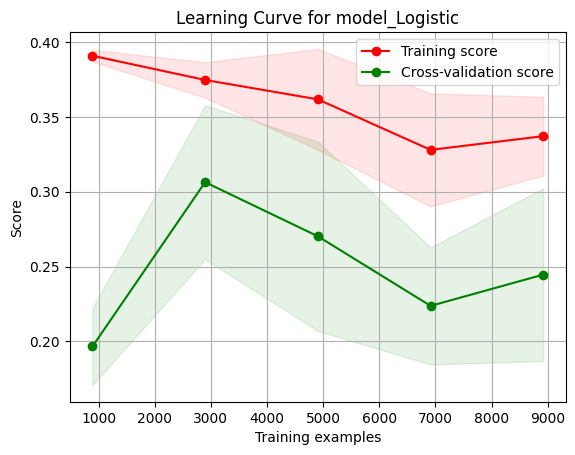

now training windows sizes = 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14866 entries, 0 to 14865
Columns: 136 entries, Volume_t-14 to Target
dtypes: float64(135), int32(1)
memory usage: 15.4 MB
None
now training windows sizes = 15
['model_DecisionTree', 'model_KNN', 'model_Logistic']
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best k for KNN: 1
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=2024))]),
             n_jobs=-1,
             param_grid={'DT__max_depth': [None, 10, 20, 30],
                         'DT__min_samples_split': [2, 5, 10]},
             scoring='f1_macro', verbose=1), GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
  

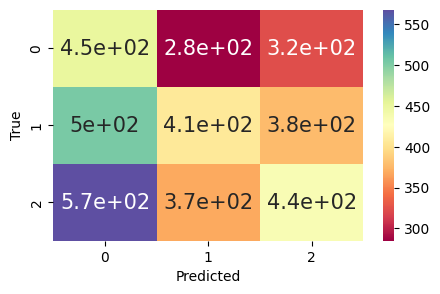

model_KNN
              precision    recall  f1-score   support

          -1       0.30      0.36      0.33      1058
           0       0.35      0.26      0.30      1286
           1       0.38      0.42      0.40      1372

    accuracy                           0.35      3716
   macro avg       0.34      0.35      0.34      3716
weighted avg       0.35      0.35      0.34      3716



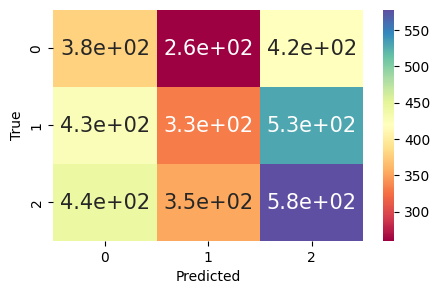

model_Logistic
              precision    recall  f1-score   support

          -1       0.30      0.32      0.31      1058
           0       0.37      0.08      0.13      1286
           1       0.37      0.61      0.46      1372

    accuracy                           0.35      3716
   macro avg       0.35      0.34      0.30      3716
weighted avg       0.35      0.35      0.30      3716



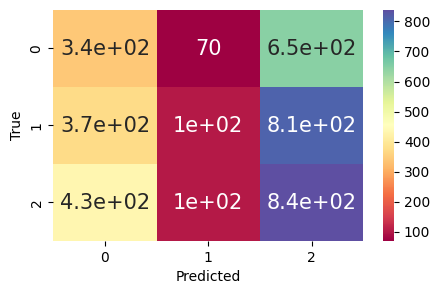

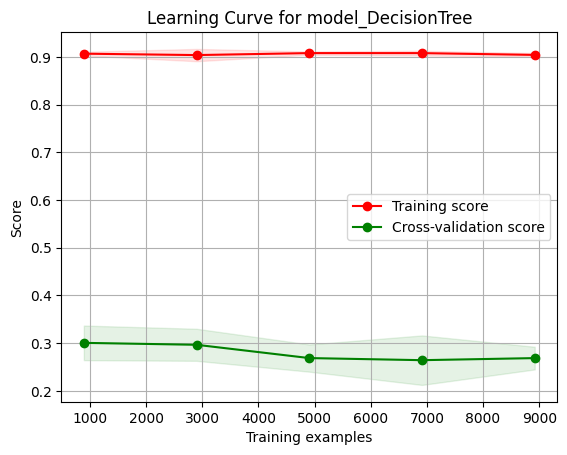

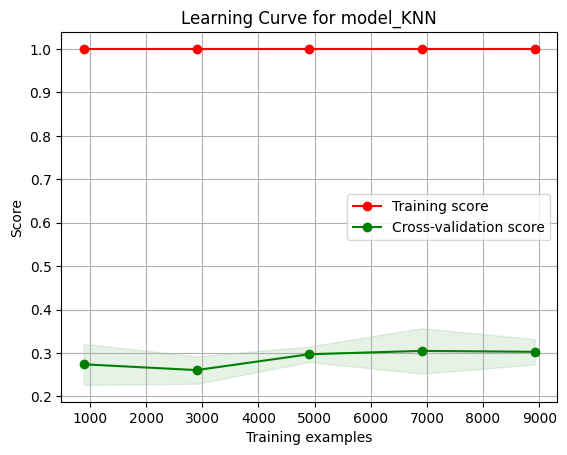

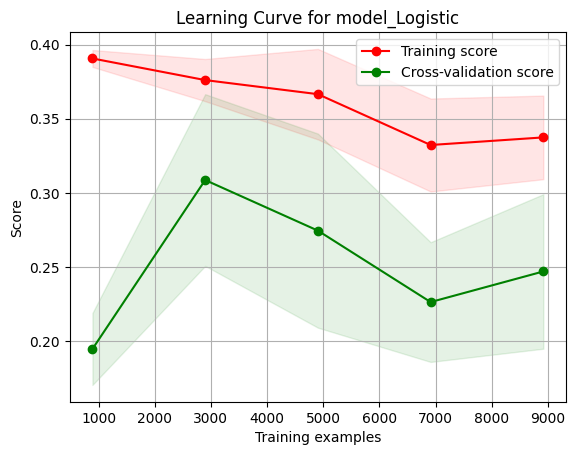

now training windows sizes = 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14861 entries, 0 to 14860
Columns: 181 entries, Volume_t-19 to Target
dtypes: float64(180), int32(1)
memory usage: 20.5 MB
None
now training windows sizes = 20
['model_DecisionTree', 'model_KNN', 'model_Logistic']
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best k for KNN: 1
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=2024))]),
             n_jobs=-1,
             param_grid={'DT__max_depth': [None, 10, 20, 30],
                         'DT__min_samples_split': [2, 5, 10]},
             scoring='f1_macro', verbose=1), GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
  

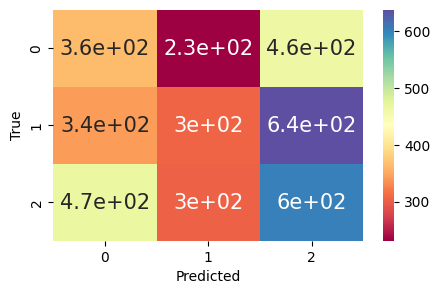

model_KNN
              precision    recall  f1-score   support

          -1       0.29      0.30      0.29      1057
           0       0.37      0.28      0.32      1286
           1       0.38      0.44      0.41      1372

    accuracy                           0.35      3715
   macro avg       0.34      0.34      0.34      3715
weighted avg       0.35      0.35      0.34      3715



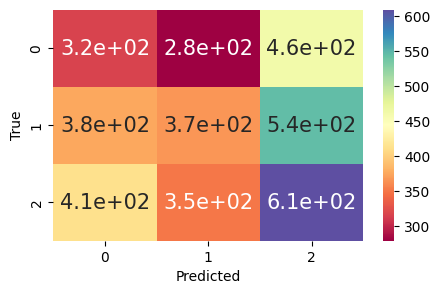

model_Logistic
              precision    recall  f1-score   support

          -1       0.29      0.28      0.28      1057
           0       0.35      0.08      0.13      1286
           1       0.36      0.63      0.46      1372

    accuracy                           0.34      3715
   macro avg       0.33      0.33      0.29      3715
weighted avg       0.34      0.34      0.29      3715



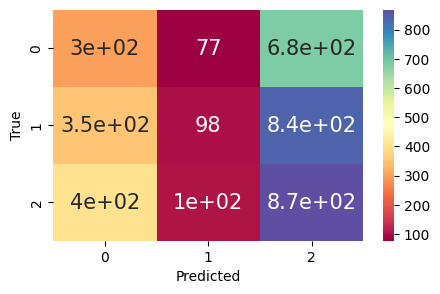

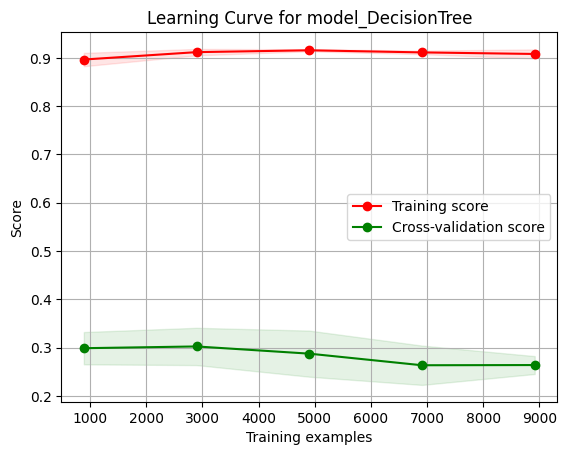

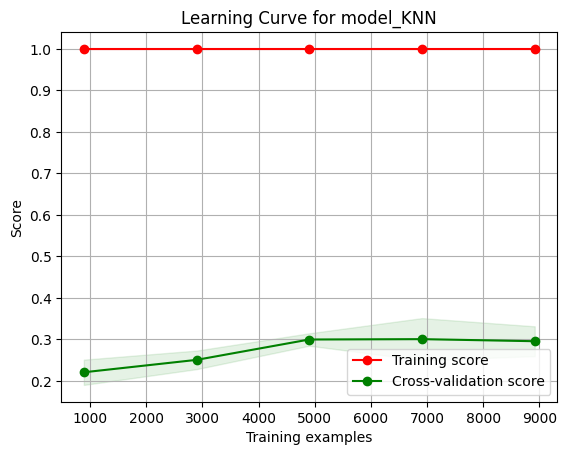

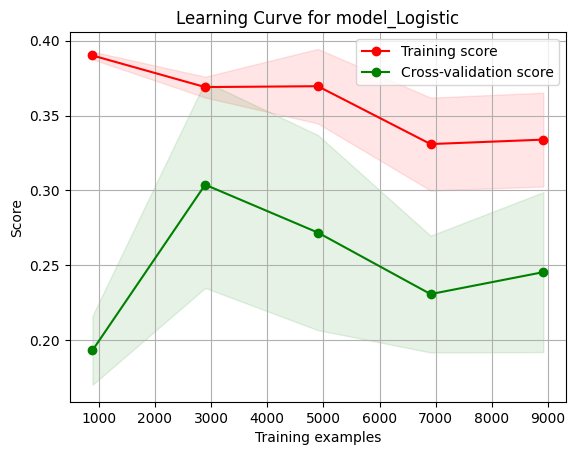

In [ ]:
instance1 = []
for i in range(0,4):
    data = rolling_features_dfs[i]
    print(f'now training windows sizes = {window_sizes[i]}')
    print(data.info())
    data['Target'] = data['Target'].astype(int)
    data.dropna(inplace=True)
    len = data.shape[0]
    X = data.drop('Target', axis=1)
    y = data['Target']
    
    #set ratio
    ratio = 0.75
    X_train = X[X.index <=len*ratio]
    X_test = X[X.index>len*ratio]
    y_train = y[y.index <=len*ratio]
    y_test = y[y.index >len*ratio]
    instance = multiple_training2(X_train, y_train, X_test, y_test)
    print(f'now training windows sizes = {window_sizes[i]}')
    instance.run()
    print(instance.models)
    instance.report()
    instance.plot_all_learning_curves()
    instance1.append(instance)

In [ ]:
#try others model with best rolling windows

In [70]:
class Other_Training():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.methods = []
        self.models = []
        self.feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

    def report(self):
        for num, model in enumerate(self.models):
            print(self.methods[num])
            ypred = model.predict(self.X_test)

            # Classification report
            print(classification_report(self.y_test, ypred))

            # Confusion matrix
            cf_matrix = confusion_matrix(self.y_test, ypred)
            plt.figure(figsize=(5, 3))
            sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 15}, cmap="Spectral")
            plt.ylabel('True')
            plt.xlabel('Predicted')
            plt.show()
            
            
            
    def plot_learning_curve(self, estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")

        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()
    
    def run(self):
        self.methods = [method for method in dir(self) if callable(getattr(self, method)) and method.startswith("model")]
        print(self.methods)
        self.models = [getattr(self, method_name)() for method_name in self.methods]

    def plot_all_learning_curves(self):
        for num, model in enumerate(self.models):
            self.plot_learning_curve(model.best_estimator_, f"Learning Curve for {self.methods[num]}", self.X_train, self.y_train, cv=5, n_jobs=-1)
    def model_SVC(self):
        pipe_SVC = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(f_classif, k=30)),  # Reduce the number of features to 10
            ('pca', PCA(n_components=30)),  # Reduce dimensionality further
            ('SVC', SVC(max_iter=5000))  # Reduced max_iter to 5000
        ])
        grid_params_SVC = {'SVC__C': [0.1, 1, 10], 'SVC__kernel': ['linear', 'rbf']}
        self.CV_SVC = GridSearchCV(estimator=pipe_SVC, param_grid=grid_params_SVC, cv=3, scoring='f1_macro', verbose=1)
        self.CV_SVC.fit(self.X_train, self.y_train)
        return self.CV_SVC

    def model_RandomForest(self):
        pipe_RandomForest = imbpipeline([
            (  'scaler', StandardScaler()),
            ('feature_selection', SelectKBest(f_classif, k=30)),  # Reduce the number of features to 10
            ('RandomForest', RandomForestClassifier(random_state=2024))
        ])
        grid_params_RandomForest = {'RandomForest__n_estimators': [50, 100], 'RandomForest__max_depth': [10, 20]}
        self.CV_RandomForest = GridSearchCV(estimator=pipe_RandomForest, param_grid=grid_params_RandomForest, cv=3, scoring='f1_macro', verbose=1)
        self.CV_RandomForest.fit(self.X_train, self.y_train)
        return self.CV_RandomForest

    def model_GradientBoosting(self):
        pipe_GradientBoosting = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(f_classif, k=30)),  # Reduce the number of features to 10
            ('GradientBoosting', GradientBoostingClassifier(random_state=2024))
        ])
        grid_params_GradientBoosting = {'GradientBoosting__n_estimators': [2, 4], 'GradientBoosting__learning_rate': [0.1, 0.2], 'GradientBoosting__max_depth': [3, 5]}
        self.CV_GradientBoosting = GridSearchCV(estimator=pipe_GradientBoosting, param_grid=grid_params_GradientBoosting, cv=3, scoring='f1_macro', verbose=1)
        self.CV_GradientBoosting.fit(self.X_train, self.y_train)
        return self.CV_GradientBoosting

    

now training windows sizes = 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Volume_t-4       14876 non-null  float64
 1   SMA_20_t-4       14876 non-null  float64
 2   EMA_20_t-4       14876 non-null  float64
 3   RSI_t-4          14876 non-null  float64
 4   MACD_t-4         14876 non-null  float64
 5   MACD_Signal_t-4  14876 non-null  float64
 6   Up_t-4           14876 non-null  float64
 7   Down_t-4         14876 non-null  float64
 8   Change_t-4       14876 non-null  float64
 9   Volume_t-3       14876 non-null  float64
 10  SMA_20_t-3       14876 non-null  float64
 11  EMA_20_t-3       14876 non-null  float64
 12  RSI_t-3          14876 non-null  float64
 13  MACD_t-3         14876 non-null  float64
 14  MACD_Signal_t-3  14876 non-null  float64
 15  Up_t-3           14876 non-null  float64
 16  Down_t-3         14876 non-

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundat

[GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest(k=30)),
                                       ('GradientBoosting',
                                        GradientBoostingClassifier(random_state=2024))]),
             param_grid={'GradientBoosting__learning_rate': [0.1, 0.2],
                         'GradientBoosting__max_depth': [3, 5],
                         'GradientBoosting__n_estimators': [2, 4]},
             scoring='f1_macro', verbose=1), GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest(k=30)),
                                       ('RandomForest',
                                        RandomForestClassifier(random_state=2024))]),
             param_grid={'RandomForest__max_depth': [10, 20],
                         'RandomForest__n_estimators': [50

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


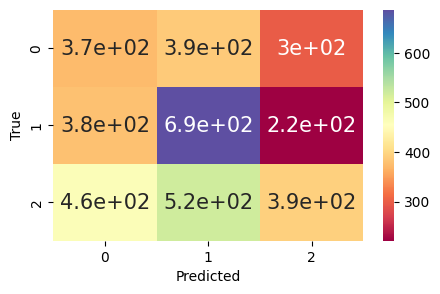

model_RandomForest
              precision    recall  f1-score   support

          -1       0.28      0.27      0.28      1059
           0       0.39      0.11      0.17      1286
           1       0.37      0.62      0.46      1373

    accuracy                           0.34      3718
   macro avg       0.34      0.33      0.30      3718
weighted avg       0.35      0.34      0.31      3718



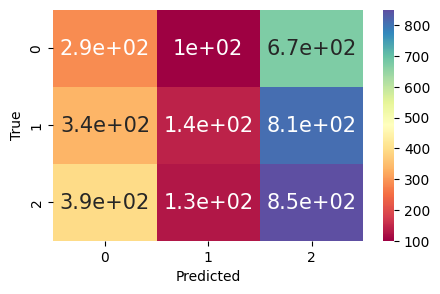

model_SVC
              precision    recall  f1-score   support

          -1       0.36      0.22      0.28      1059
           0       0.31      0.25      0.27      1286
           1       0.33      0.48      0.39      1373

    accuracy                           0.33      3718
   macro avg       0.33      0.32      0.31      3718
weighted avg       0.33      0.33      0.32      3718



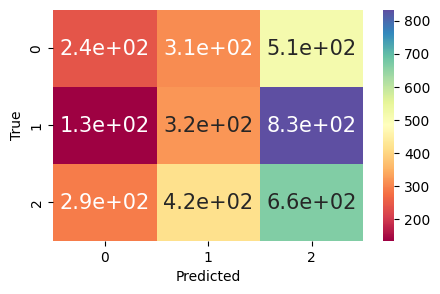

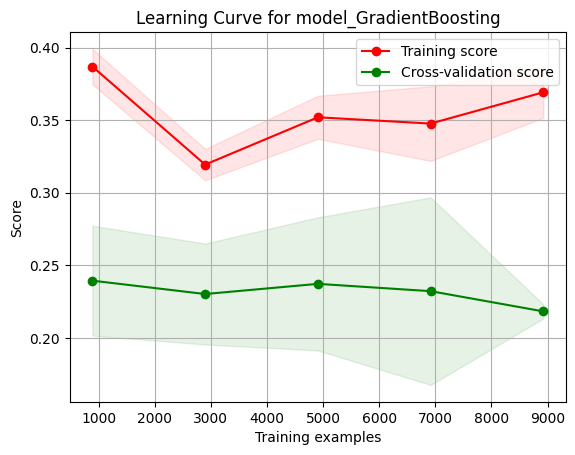

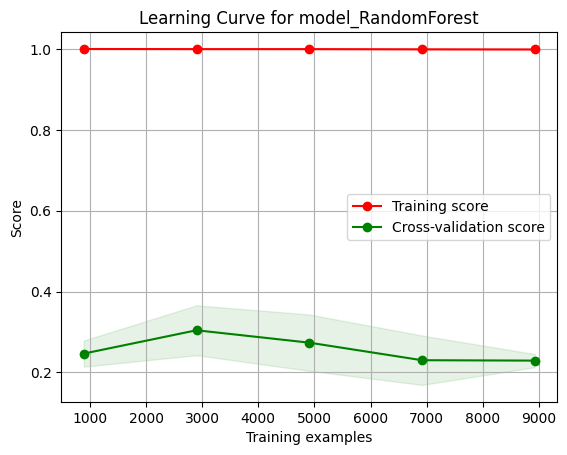

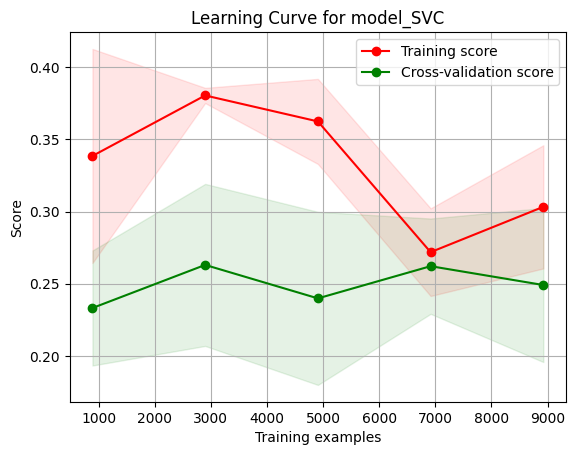

In [ ]:
instance2 = []
for i in range(0, 1):
    data = rolling_features_dfs[i]
    print(f'now training windows sizes = {window_sizes[i]}')
    print(data.info())
    data['Target'] = data['Target'].astype(int)
    data.dropna(inplace=True)
    len = data.shape[0]
    X = data.drop('Target', axis=1)
    y = data['Target']
    
    #set ratio
    ratio = 0.75
    X_train = X[X.index <=len*ratio]
    X_test = X[X.index>len*ratio]
    y_train = y[y.index <=len*ratio]
    y_test = y[y.index >len*ratio]
    instance = Other_Training(X_train, y_train, X_test, y_test)
    print(f'now training windows sizes = {window_sizes[i]}')
    instance.run()
    print(instance.models)
    instance.report()
    instance.plot_all_learning_curves()
    instance2.append(instance)

so we decide to remove rolling feature and vary predict date instead


In [ ]:
rolling_features_dfs.clear()

In [3]:
df = pd.read_csv('sp500_with_indicators.csv')
print()
df.head

<bound method NDFrame.head of                             Date         Open         High          Low  \
0      1928-03-13 00:00:00-05:00    17.920000    17.920000    17.920000   
1      1928-03-14 00:00:00-05:00    17.930000    17.930000    17.930000   
2      1928-03-15 00:00:00-05:00    18.070000    18.070000    18.070000   
3      1928-03-16 00:00:00-05:00    18.260000    18.260000    18.260000   
4      1928-03-19 00:00:00-05:00    18.360001    18.360001    18.360001   
...                          ...          ...          ...          ...   
24188  2024-06-27 00:00:00-04:00  5473.589844  5490.810059  5467.540039   
24189  2024-06-28 00:00:00-04:00  5488.479980  5523.640137  5451.120117   
24190  2024-07-01 00:00:00-04:00  5471.080078  5479.549805  5446.529785   
24191  2024-07-02 00:00:00-04:00  5461.839844  5509.689941  5458.430176   
24192  2024-07-03 00:00:00-04:00  5507.439941  5539.270020  5507.419922   

             Close      Volume  Dividends  Stock Splits       SMA_20 

In [4]:
df2 = df
# df2['Close_Next_Day'] = df2['Close'].shift(-1)
df2['Change'] = (df2['Close'] - df2['Close'].shift(1))/df2['Close'] #create new feature
df2['Up'] = (df2['High'] - df2['Close'])/df2['Close']
df2['Down'] = (df2['Low'] - df2['Close'])/df2['Close']
df2['Delta_SMA'] = df2['SMA_20'] - df2['SMA_50']
df2['Delta_EMA'] = df2['EMA_20'] - df2['EMA_50']



# Drop the last row as it will have NaN in the 'Close_Next_Day'
df2 = df2.dropna()
df2 = df2[(df2['Volume'] != 0) & (df2['Up'] != 0) & (df2['Down'] != 0)]
df2 = df2[df2['Volume']!=0]
df2

Date         Open         High          Low  \
8460   1962-01-02 00:00:00-05:00     0.000000    71.959999    70.709999   
8461   1962-01-03 00:00:00-05:00     0.000000    71.480003    70.379997   
8462   1962-01-04 00:00:00-05:00     0.000000    71.620003    70.449997   
8463   1962-01-05 00:00:00-05:00     0.000000    70.839996    69.349998   
8464   1962-01-08 00:00:00-05:00     0.000000    69.839996    68.169998   
...                          ...          ...          ...          ...   
24188  2024-06-27 00:00:00-04:00  5473.589844  5490.810059  5467.540039   
24189  2024-06-28 00:00:00-04:00  5488.479980  5523.640137  5451.120117   
24190  2024-07-01 00:00:00-04:00  5471.080078  5479.549805  5446.529785   
24191  2024-07-02 00:00:00-04:00  5461.839844  5509.689941  5458.430176   
24192  2024-07-03 00:00:00-04:00  5507.439941  5539.270020  5507.419922   

             Close      Volume  Dividends  Stock Splits       SMA_20  \
8460     70.959999     3120000        0.0           0.0    71.700001   
8461     71.129997     3590000        0.0           0.0    71.656001   
8462     70.639999     4450000        0.0           0.0    71.591500   
8463     69.660004     4630000        0.0           0.0    71.475001   
8464     69.120003     4620000        0.0           0.0    71.346001   
...            ...         ...        ...           ...          ...   
24188  5482.870117  3589530000        0.0           0.0  5397.008960   
24189  5460.479980  7199220000        0.0           0.0  5408.258960   
24190  5475.089844  3488760000        0.0           0.0  5418.137964   
24191  5509.009766  3329950000        0.0           0.0  5429.418457   
24192  5537.020020  2179470000        0.0           0.0  5441.702466   

            SMA_50  ...       EMA_50        RSI       MACD  MACD_Signal  \
8460     70.839600  ...    70.754064  43.966599   0.053701     0.189011   
8461     70.893200  ...    70.768807  46.740876   0.026092     0.156427   
8462     70.946000  ...    70.763755  40.514343  -0.034925     0.118157   
8463     70.978000  ...    70.720471  31.481580  -0.160508     0.062424   
8464     71.000800  ...    70.657707  27.803163  -0.300148    -0.010090   
...            ...  ...          ...        ...        ...          ...   
24188  5261.114600  ...  5304.630774  71.093672  60.552786    60.083335   
24189  5269.880000  ...  5310.742508  65.133083  57.376513    59.541970   
24190  5279.159395  ...  5317.187501  67.073005  55.399576    58.713492   
24191  5289.994990  ...  5324.709943  71.094152  55.925223    58.155838   
24192  5300.523389  ...  5333.035828  73.925897  57.934165    58.111503   

       MACD_Diff    Change        Up      Down   Delta_SMA   Delta_EMA  
8460   -0.135310 -0.008315  0.014092 -0.003523    0.860401    0.696975  
8461   -0.130335  0.002390  0.004921 -0.010544    0.762800    0.651658  
8462   -0.153082 -0.006937  0.013873 -0.002690    0.645500    0.582379  
8463   -0.222932 -0.014068  0.016939 -0.004450    0.497001    0.465079  
8464   -0.290057 -0.007813  0.010417 -0.013744    0.345201    0.331124  
...          ...       ...       ...       ...         ...         ...  
24188   0.469451  0.000906  0.001448 -0.002796  135.894360  103.544337  
24189  -2.165457 -0.004100  0.011567 -0.001714  138.378960  102.414019  
24190  -3.313915  0.002668  0.000815 -0.005216  138.978569  101.867437  
24191  -2.230615  0.006157  0.000123 -0.009181  139.423467  102.912122  
24192  -0.177338  0.005059  0.000406 -0.005346  141.179077  105.005089  

[14885 rows x 21 columns]

In [73]:
df2.describe().T

count          mean           std           min           25%  \
Open          14885.0  9.414874e+02  1.188808e+03  0.000000e+00  0.000000e+00   
High          14885.0  9.792945e+02  1.170187e+03  5.283000e+01  1.040300e+02   
Low           14885.0  9.674744e+02  1.157391e+03  5.135000e+01  1.023500e+02   
Close         14885.0  9.736913e+02  1.164260e+03  5.232000e+01  1.032200e+02   
Volume        14885.0  1.409022e+09  1.841334e+09  1.950000e+06  2.147000e+07   
Dividends     14885.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Stock Splits  14885.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
SMA_20        14885.0  9.704813e+02  1.158657e+03  5.500000e+01  1.031010e+02   
SMA_50        14885.0  9.653944e+02  1.150360e+03  5.648800e+01  1.029210e+02   
EMA_20        14885.0  9.705044e+02  1.158568e+03  5.554703e+01  1.031143e+02   
EMA_50        14885.0  9.654802e+02  1.150253e+03  5.687035e+01  1.028038e+02   
RSI           14885.0  5.360261e+01  1.260935e+01  1.135964e+01  4.476963e+01   
MACD          14885.0  2.393928e+00  1.671466e+01 -2.370202e+02 -8.123435e-01   
MACD_Signal   14885.0  2.382525e+00  1.563957e+01 -1.986407e+02 -7.214875e-01   
MACD_Diff     14885.0  1.140254e-02  5.212831e+00 -6.122110e+01 -6.009692e-01   
Change        14885.0 -4.985550e-05  1.015732e-02 -2.573386e-01 -4.464317e-03   
Up            14885.0  6.894465e-03  6.935907e-03  3.236181e-06  2.314696e-03   
Down          14885.0 -7.111578e-03  6.265932e-03 -1.016142e-01 -9.342869e-03   
Delta_SMA     14885.0  5.086882e+00  3.597598e+01 -4.231780e+02 -1.769200e+00   
Delta_EMA     14885.0  5.024183e+00  2.554233e+01 -2.592072e+02 -8.690423e-01   

                       50%           75%           max  
Open          4.425800e+02  1.341100e+03  5.507440e+03  
High          4.450100e+02  1.350700e+03  5.539270e+03  
Low           4.410700e+02  1.331090e+03  5.507420e+03  
Close         4.425500e+02  1.340890e+03  5.537020e+03  
Volume        2.456000e+08  3.072410e+09  1.145623e+10  
Dividends     0.000000e+00  0.000000e+00  0.000000e+00  
Stock Splits  0.000000e+00  0.000000e+00  0.000000e+00  
SMA_20        4.427700e+02  1.337899e+03  5.441702e+03  
SMA_50        4.430882e+02  1.335587e+03  5.300523e+03  
EMA_20        4.427470e+02  1.337764e+03  5.438041e+03  
EMA_50        4.432151e+02  1.339203e+03  5.333036e+03  
RSI           5.440769e+01  6.291149e+01  8.586217e+01  
MACD          6.920967e-01  5.286445e+00  9.258371e+01  
MACD_Signal   6.712557e-01  5.111395e+00  8.188411e+01  
MACD_Diff     9.560988e-03  6.204194e-01  6.089580e+01  
Change        2.553846e-04  4.813841e-03  1.037823e-01  
Up            5.472494e-03  9.252904e-03  2.573386e-01  
Down         -5.825911e-03 -3.143766e-03 -3.780052e-06  
Delta_SMA     1.388400e+00  1.095030e+01  2.014590e+02  
Delta_EMA     1.394968e+00  1.010530e+01  1.282973e+02

In [5]:
df2 = df2.drop(columns=['Open', 'Date','Dividends', 'Stock Splits'], axis=1)

In [6]:
df2 = df2.drop(columns=['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50'], axis=1)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14885 entries, 8460 to 24192
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   High         14885 non-null  float64
 1   Low          14885 non-null  float64
 2   Close        14885 non-null  float64
 3   Volume       14885 non-null  int64  
 4   RSI          14885 non-null  float64
 5   MACD         14885 non-null  float64
 6   MACD_Signal  14885 non-null  float64
 7   MACD_Diff    14885 non-null  float64
 8   Change       14885 non-null  float64
 9   Up           14885 non-null  float64
 10  Down         14885 non-null  float64
 11  Delta_SMA    14885 non-null  float64
 12  Delta_EMA    14885 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.6 MB


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.feature_selection import RFECV
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.exceptions import ConvergenceWarning
import os
import xgboost as xgb
# Ignore all ConvergenceWarning warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [11]:
class single_training():
    def __init__(self, X_train, y_train, X_test, y_test, output_folder="output"):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.methods = []
        self.models = []
        self.feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]
        self.output_folder = output_folder
        if not os.path.exists(self.output_folder):
            os.makedirs(self.output_folder)

    def report(self, shift_value):
        accuracy_scores = []
        for num, model in enumerate(self.models):
            print(self.methods[num])
            ypred = model.predict(self.X_test)

            # Classification report
            report = classification_report(self.y_test, ypred, output_dict=True)
            accuracy = report['accuracy']
            accuracy_scores.append(accuracy)
            print(classification_report(self.y_test, ypred))

            # Confusion matrix
            cf_matrix = confusion_matrix(self.y_test, ypred)
            plt.figure(figsize=(5, 3))
            sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 15}, cmap="Spectral")
            plt.ylabel('True')
            plt.xlabel('Predicted')
            plt.title(f"Confusion Matrix for {self.methods[num]} - Shift {shift_value} days")
            plt.savefig(os.path.join(self.output_folder, f"confusion_matrix_{self.methods[num]}_shift_{shift_value}.png"))
            plt.close()

            # Feature importance
            if hasattr(model.best_estimator_, 'coef_'):
                importances = model.best_estimator_.coef_[0]
                self.plot_feature_importance(importances, self.feature_names, title=f"Feature Importance for {self.methods[num]} - Shift {shift_value} days", shift_value=shift_value)

        return accuracy_scores

    def plot_learning_curve(self, estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), shift_value=0, model_name="Model"):
        plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")

        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_folder, f"{title}.png"))
        plt.close()
        
    def run(self):
        self.methods = [method for method in dir(self) if callable(getattr(self, method)) and method.startswith("model")]
        print(self.methods)
        self.models = [getattr(self, method_name)() for method_name in self.methods]

    def plot_all_learning_curves(self, shift_value):
        for num, model in enumerate(self.models):
            self.plot_learning_curve(model.best_estimator_, f"Learning Curve for {self.methods[num]} - Shift {shift_value} days", self.X_train, self.y_train, cv=5, n_jobs=-1, shift_value=shift_value)

    def model_Logistic(self):
        pipe_Logistic = Pipeline([
            ('scaler', StandardScaler()),
            ('Logistic', LogisticRegression(random_state=2024, max_iter=2000))
        ])
        grid_params_Logistic = {
            'Logistic__C': [0.01, 0.1, 1, 10, 100],
            'Logistic__solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
        self.CV_Logistic = GridSearchCV(estimator=pipe_Logistic, param_grid=grid_params_Logistic, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
        self.CV_Logistic.fit(self.X_train, self.y_train)
        print(self.CV_Logistic.best_params_)
        return self.CV_Logistic
    def model_DecisionTree(self):
        pipe_DT = Pipeline([
            ('scaler', StandardScaler()),
            ('DT', DecisionTreeClassifier(random_state=2024))
        ])
        grid_params_DT = {'DT__max_depth': [None, 10, 20, 30], 'DT__min_samples_split': [2, 5, 10]}
        self.CV_DT = GridSearchCV(estimator=pipe_DT, param_grid=grid_params_DT, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
        self.CV_DT.fit(self.X_train, self.y_train)
        print(self.CV_DT.best_params_)
        return self.CV_DT
    def model_KNN(self):
        pipe_KNN = Pipeline([
            ('scaler', StandardScaler()),
            ('KNN', KNeighborsClassifier())
        ])
        grid_params_KNN = {'KNN__n_neighbors': [1, 3, 5, 7, 9], 'KNN__weights': ['uniform', 'distance']}
        self.CV_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=grid_params_KNN, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
        self.CV_KNN.fit(self.X_train, self.y_train)
        print(self.CV_KNN.best_params_)
        return self.CV_KNN
    def model_SVC(self):
        pipe_SVC = imbpipeline([
            ('scaler', StandardScaler()),
            ('SVC', SVC(max_iter=5000))  # Reduced max_iter to 5000
        ])
        grid_params_SVC = {'SVC__C': [0.1, 1, 10], 'SVC__kernel': ['linear', 'rbf']}
        self.CV_SVC = GridSearchCV(estimator=pipe_SVC, param_grid=grid_params_SVC, cv=3, scoring='f1_macro', verbose=1)
        self.CV_SVC.fit(self.X_train, self.y_train)
        print(self.CV_SVC.best_params_)
        return self.CV_SVC

    def model_RandomForest(self):
        pipe_RandomForest = imbpipeline([
            (  'scaler', StandardScaler()),
            ('RandomForest', RandomForestClassifier(random_state=2024))
        ])
        grid_params_RandomForest = {'RandomForest__n_estimators': [50, 100], 'RandomForest__max_depth': [10, 20]}
        self.CV_RandomForest = GridSearchCV(estimator=pipe_RandomForest, param_grid=grid_params_RandomForest, cv=3, scoring='f1_macro', verbose=1)
        self.CV_RandomForest.fit(self.X_train, self.y_train)
        print(self.CV_RandomForest.best_params_)
        return self.CV_RandomForest

    def model_GradientBoosting(self):
        pipe_GradientBoosting = imbpipeline([
            ('scaler', StandardScaler()),
            ('GradientBoosting', GradientBoostingClassifier(random_state=2024))
        ])
        grid_params_GradientBoosting = {'GradientBoosting__n_estimators': [2, 4], 'GradientBoosting__learning_rate': [0.1, 0.2], 'GradientBoosting__max_depth': [3, 5]}
        self.CV_GradientBoosting = GridSearchCV(estimator=pipe_GradientBoosting, param_grid=grid_params_GradientBoosting, cv=3, scoring='f1_macro', verbose=1)
        self.CV_GradientBoosting.fit(self.X_train, self.y_train)
        print(self.CV_GradientBoosting.best_params_)
        return self.CV_GradientBoosting

i = 1
threshold = 0.003
Now training 1 days prediction in the future
['model_DecisionTree', 'model_GradientBoosting', 'model_KNN', 'model_Logistic', 'model_RandomForest', 'model_SVC']
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'DT__max_depth': 10, 'DT__min_samples_split': 2}
Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'GradientBoosting__learning_rate': 0.1, 'GradientBoosting__max_depth': 5, 'GradientBoosting__n_estimators': 4}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'Logistic__C': 100, 'Logistic__solver': 'newton-cg'}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'RandomForest__max_depth': 10, 'RandomForest__n_estimators': 50}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'SVC__C': 1, 'SVC__kernel': 'rbf'}
Now finishing training 1 days prediction in the future
Now evaluating 1 days predic

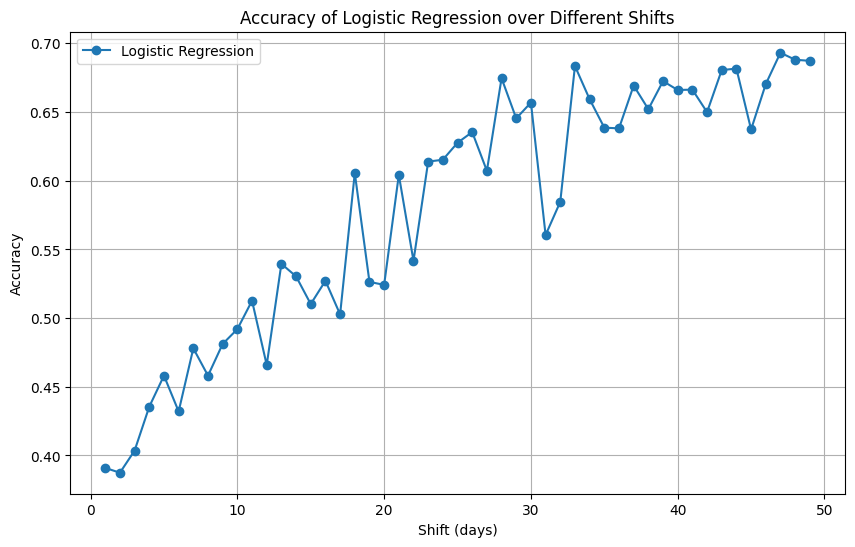

In [67]:
# Initialize a list to store the accuracy scores for each shift value
accuracy_scores = []
instance3 = []
# Define the output folder
# Define the output folder
output_folder = "output"

# Run the training and evaluation for each shift value
for i in range(1, 50):
    threshold = 0.002 + 0.001 * i
    print(f'i = {i}')
    print(f'threshold = {threshold}')
    shifted_data = df2.copy()
    shifted_data['Close_Next_Day'] = df2['Close'].shift(-i)
    shifted_data['Target'] = shifted_data.apply(
        lambda row: 1 if (row['Close_Next_Day'] > row['Close'] * (1 + threshold)) else (
                    -1 if (row['Close_Next_Day'] < row['Close'] * (1 - threshold)) else 0),
        axis=1
    )
    shifted_data = shifted_data.drop(columns=['Close_Next_Day'], axis=1)
    shifted_data = shifted_data.dropna()
    # Correlation matrix
    correlation_matrix = shifted_data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Correlation Matrix - Shift {i} days')
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f"correlation_matrix_shift_{i}.png"))
    plt.close()
    
    X = shifted_data.drop('Target', axis=1)
    y = shifted_data['Target']
    
    # Balance the classes using SMOTE
    smote = SMOTE(random_state=2024)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    instance = single_training(X_resampled, y_resampled, X_test, y_test, output_folder=output_folder)
    print(f'Now training {i} days prediction in the future')
    instance.run()
    print(f'Now finishing training {i} days prediction in the future')
    print(f'Now evaluating {i} days prediction in the future')
    accuracies = instance.report(shift_value=i)
    accuracy_scores.append((i, accuracies))
    print(f'Now plotting {i} days prediction in the future')
    instance.plot_all_learning_curves(shift_value=i)
    instance3.append(instance)

    

# Extract the accuracy scores for plotting
shifts = [score[0] for score in accuracy_scores]
logistic_accuracies = [score[1][0] for score in accuracy_scores]

# Plot the accuracy scores over shift values
plt.figure(figsize=(10, 6))
plt.plot(shifts, logistic_accuracies, marker='o', label='Logistic Regression')
plt.xlabel('Shift (days)')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression over Different Shifts')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_folder, "accuracy_over_shifts.png"))
plt.show()


In [ ]:
import pickle

# Save the instance to a file
with open('instance3.pkl', 'wb') as file:
    pickle.dump(instance3, file)
with open('acc3.pkl', 'wb') as file:
    pickle.dump(accuracy_scores, file)

print("Class instance4 saved to instance3.pkl")
print("Class instance4 saved to acc3.pkl")

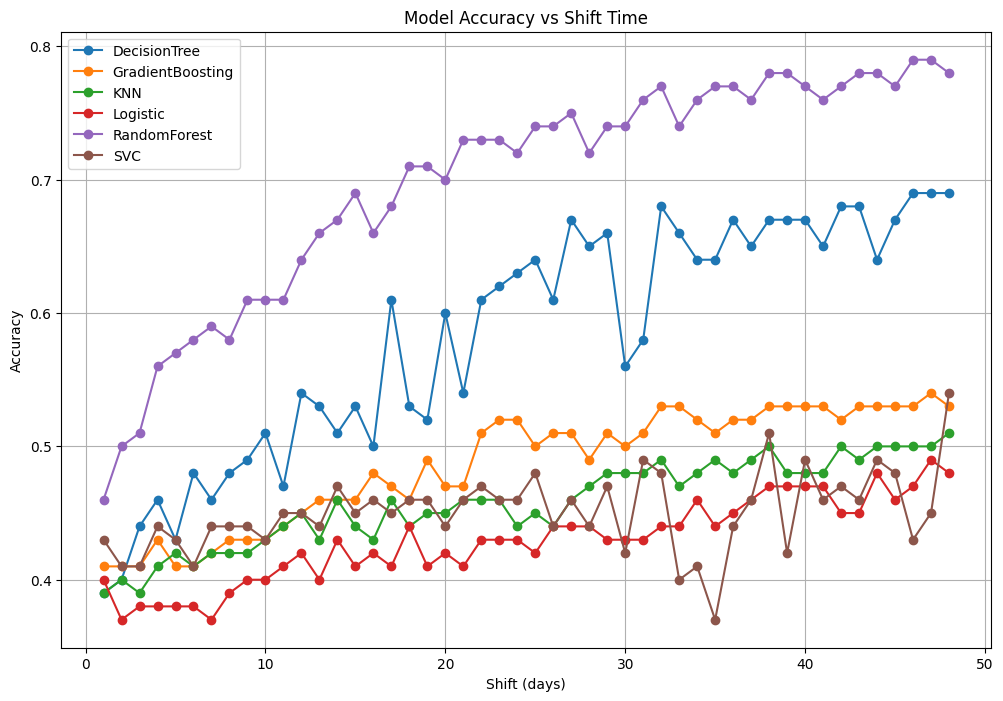

In [50]:
import re
import matplotlib.pyplot as plt

# Load the log file content
with open('training_log.txt', 'r') as file:
    log_string = file.read()

# Regular expressions to extract the necessary information
shift_pattern = re.compile(r"i = (\d+)")
accuracy_pattern = re.compile(r"accuracy\s+(\d\.\d+)")

# Model names and patterns
model_patterns = {
    "DecisionTree": re.compile(r"model_DecisionTree\s+[\s\S]*?accuracy\s+(\d\.\d+)"),
    "GradientBoosting": re.compile(r"model_GradientBoosting\s+[\s\S]*?accuracy\s+(\d\.\d+)"),
    "KNN": re.compile(r"model_KNN\s+[\s\S]*?accuracy\s+(\d\.\d+)"),
    "Logistic": re.compile(r"model_Logistic\s+[\s\S]*?accuracy\s+(\d\.\d+)"),
    "RandomForest": re.compile(r"model_RandomForest\s+[\s\S]*?accuracy\s+(\d\.\d+)"),
    "SVC": re.compile(r"model_SVC\s+[\s\S]*?accuracy\s+(\d\.\d+)")
}

# Data structure to store extracted accuracies
accuracy_data = {model: [] for model in model_patterns}
shift_values = []

# Extract shift values and accuracies
shift_matches = shift_pattern.findall(log_string)
shifted_sections = log_string.split("Now plotting")[1:]  # Split log by 'Now plotting' to isolate sections for each shift

for i, section in enumerate(shifted_sections):
    shift = int(shift_matches[i])
    shift_values.append(shift)
    for model, pattern in model_patterns.items():
        match = pattern.search(section)
        if match:
            accuracy = float(match.group(1))
            accuracy_data[model].append(accuracy)
        else:
            accuracy_data[model].append(None)

# Plotting
plt.figure(figsize=(12, 8))
for model, accuracies in accuracy_data.items():
    plt.plot(shift_values, accuracies, marker='o', label=model)

plt.xlabel('Shift (days)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Shift Time')
plt.legend()
plt.grid(True)
plt.show()


i = 1
threshold = 0.003
i = 2
threshold = 0.004
i = 3
threshold = 0.005
i = 4
threshold = 0.006
i = 5
threshold = 0.007
i = 6
threshold = 0.008
i = 7
threshold = 0.009000000000000001
i = 8
threshold = 0.01
i = 9
threshold = 0.011000000000000001
i = 10
threshold = 0.012
i = 11
threshold = 0.013
i = 12
threshold = 0.014
i = 13
threshold = 0.015000000000000001
i = 14
threshold = 0.016
i = 15
threshold = 0.017
i = 16
threshold = 0.018000000000000002
i = 17
threshold = 0.019000000000000003
i = 18
threshold = 0.020000000000000004
i = 19
threshold = 0.020999999999999998
i = 20
threshold = 0.022
i = 21
threshold = 0.023
i = 22
threshold = 0.024
i = 23
threshold = 0.025
i = 24
threshold = 0.026000000000000002
i = 25
threshold = 0.027000000000000003
i = 26
threshold = 0.028000000000000004
i = 27
threshold = 0.028999999999999998
i = 28
threshold = 0.03
i = 29
threshold = 0.031
i = 30
threshold = 0.032
i = 31
threshold = 0.033
i = 32
threshold = 0.034
i = 33
threshold = 0.035
i = 34
threshold = 0.

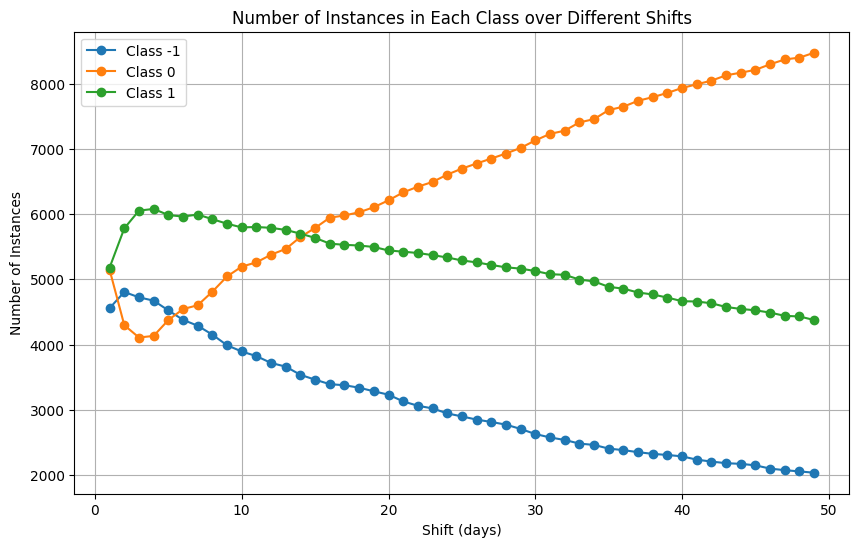

In [85]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a list to store the class counts for each shift value
class_counting = []

# Define the output folder
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

# Run the training and evaluation for each shift value
for i in range(1, 50):
    threshold = 0.002 + 0.001 * i
    print(f'i = {i}')
    print(f'threshold = {threshold}')
    shifted_data = df2.copy()
    shifted_data['Close_Next_Day'] = df2['Close'].shift(-i)
    shifted_data['Target'] = shifted_data.apply(
        lambda row: 1 if (row['Close_Next_Day'] > row['Close'] * (1 + threshold)) else (
                    -1 if (row['Close_Next_Day'] < row['Close'] * (1 - threshold)) else 0),
        axis=1
    )
    shifted_data = shifted_data.drop(columns=['Close_Next_Day'], axis=1)
    shifted_data = shifted_data.dropna()
    
    # Count the number of instances in each class
    class_counts = shifted_data['Target'].value_counts().sort_index()
    class_counting.append((i, class_counts))
    


# Plot the number of data points in each class over shift values
class_counts_data = pd.DataFrame(class_counting, columns=['Shift', 'ClassCounts'])
class_counts_data = class_counts_data.set_index('Shift')['ClassCounts'].apply(pd.Series).fillna(0)

plt.figure(figsize=(10, 6))
for class_label in class_counts_data.columns:
    plt.plot(class_counts_data.index, class_counts_data[class_label], marker='o', label=f'Class {class_label}')
plt.xlabel('Shift (days)')
plt.ylabel('Number of Instances')
plt.title('Number of Instances in Each Class over Different Shifts')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_folder, "class_counts_over_shifts_linear.png"))
plt.show()


i = 1
threshold = 0.00299
i = 2
threshold = 0.00396
i = 3
threshold = 0.00491
i = 4
threshold = 0.00584
i = 5
threshold = 0.00675
i = 6
threshold = 0.00764
i = 7
threshold = 0.00851
i = 8
threshold = 0.00936
i = 9
threshold = 0.010190000000000001
i = 10
threshold = 0.011
i = 11
threshold = 0.011789999999999998
i = 12
threshold = 0.01256
i = 13
threshold = 0.01331
i = 14
threshold = 0.01404
i = 15
threshold = 0.014750000000000001
i = 16
threshold = 0.015440000000000002
i = 17
threshold = 0.016110000000000003
i = 18
threshold = 0.016760000000000004
i = 19
threshold = 0.017389999999999996
i = 20
threshold = 0.018
i = 21
threshold = 0.01859
i = 22
threshold = 0.01916
i = 23
threshold = 0.019710000000000002
i = 24
threshold = 0.02024
i = 25
threshold = 0.020750000000000005
i = 26
threshold = 0.021240000000000002
i = 27
threshold = 0.021709999999999997
i = 28
threshold = 0.02216
i = 29
threshold = 0.02259
i = 30
threshold = 0.023
i = 31
threshold = 0.02339
i = 32
threshold = 0.02376000000000

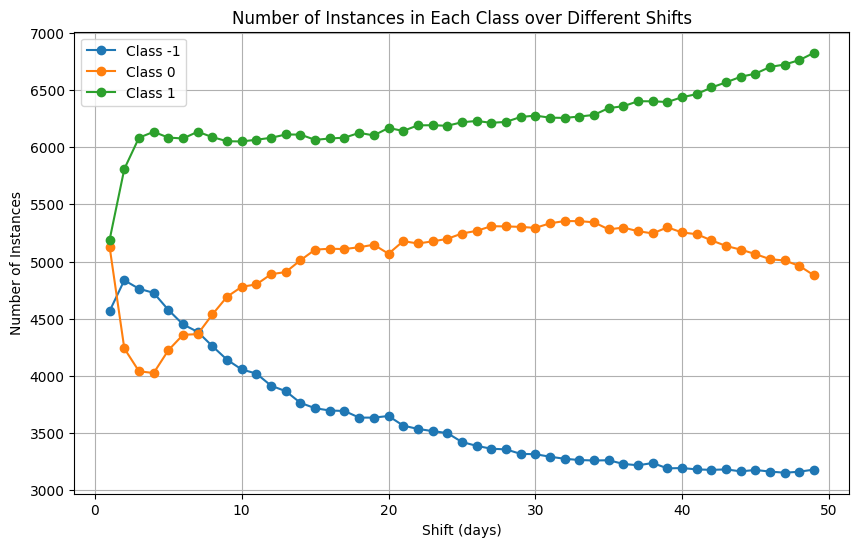

In [84]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a list to store the class counts for each shift value
class_counting = []

# Define the output folder
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

# Run the training and evaluation for each shift value
for i in range(1, 50):
    threshold = 0.002 + 0.001 * i-0.00001*i*i
    print(f'i = {i}')
    print(f'threshold = {threshold}')
    shifted_data = df2.copy()
    shifted_data['Close_Next_Day'] = df2['Close'].shift(-i)
    shifted_data['Target'] = shifted_data.apply(
        lambda row: 1 if (row['Close_Next_Day'] > row['Close'] * (1 + threshold)) else (
                    -1 if (row['Close_Next_Day'] < row['Close'] * (1 - threshold)) else 0),
        axis=1
    )
    shifted_data = shifted_data.drop(columns=['Close_Next_Day'], axis=1)
    shifted_data = shifted_data.dropna()
    
    # Count the number of instances in each class
    class_counts = shifted_data['Target'].value_counts().sort_index()
    class_counting.append((i, class_counts))
    


# Plot the number of data points in each class over shift values
class_counts_data = pd.DataFrame(class_counting, columns=['Shift', 'ClassCounts'])
class_counts_data = class_counts_data.set_index('Shift')['ClassCounts'].apply(pd.Series).fillna(0)

plt.figure(figsize=(10, 6))
for class_label in class_counts_data.columns:
    plt.plot(class_counts_data.index, class_counts_data[class_label], marker='o', label=f'Class {class_label}')
plt.xlabel('Shift (days)')
plt.ylabel('Number of Instances')
plt.title('Number of Instances in Each Class over Different Shifts')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_folder, "class_counts_over_shifts_quadratic.png"))
plt.show()


In [79]:
# Initialize a list to store the accuracy scores for each shift value
accuracy_scores2 = []
instance4 = []
# Define the output folder
# Define the output folder
output_folder = "output2"

# Run the training and evaluation for each shift value
for i in range(1, 50):
    threshold = 0.002 + 0.001 * i-0.00001*i*i
    print(f'i = {i}')
    print(f'threshold = {threshold}')
    shifted_data = df2.copy()
    shifted_data['Close_Next_Day'] = df2['Close'].shift(-i)
    shifted_data['Target'] = shifted_data.apply(
        lambda row: 1 if (row['Close_Next_Day'] > row['Close'] * (1 + threshold)) else (
                    -1 if (row['Close_Next_Day'] < row['Close'] * (1 - threshold)) else 0),
        axis=1
    )
    shifted_data = shifted_data.drop(columns=['Close_Next_Day'], axis=1)
    shifted_data = shifted_data.dropna()
    # Correlation matrix
    correlation_matrix = shifted_data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Correlation Matrix - Shift {i} days')
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f"correlation_matrix_shift_{i}.png"))
    plt.close()
    
    X = shifted_data.drop('Target', axis=1)
    y = shifted_data['Target']
    
    # Balance the classes using SMOTE
    smote = SMOTE(random_state=2024)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    instance = single_training(X_resampled, y_resampled, X_test, y_test, output_folder=output_folder)
    print(f'Now training {i} days prediction in the future')
    instance.run()
    print(f'Now finishing training {i} days prediction in the future')
    print(f'Now evaluating {i} days prediction in the future')
    accuracies = instance.report(shift_value=i)
    accuracy_scores2.append((i, accuracies))
    print(f'Now plotting {i} days prediction in the future')
    instance.plot_all_learning_curves(shift_value=i)
    instance4.append(instance)


i = 1
threshold = 0.00299
Now training 1 days prediction in the future
['model_DecisionTree', 'model_GradientBoosting', 'model_KNN', 'model_Logistic', 'model_RandomForest', 'model_SVC']
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'DT__max_depth': 10, 'DT__min_samples_split': 5}
Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'GradientBoosting__learning_rate': 0.2, 'GradientBoosting__max_depth': 3, 'GradientBoosting__n_estimators': 4}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'Logistic__C': 100, 'Logistic__solver': 'newton-cg'}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'RandomForest__max_depth': 10, 'RandomForest__n_estimators': 100}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'SVC__C': 10, 'SVC__kernel': 'rbf'}
Now finishing training 1 days prediction in the future
Now evaluating 1 days pr

In [80]:
import pickle

# Save the instance to a file
with open('instance4.pkl', 'wb') as file:
    pickle.dump(instance4, file)
with open('acc4.pkl', 'wb') as file:
    pickle.dump(accuracy_scores2, file)

print("Class instance4 saved to instance4.pkl")
print("Class instance4 saved to acc2.pkl")

Class instance4 saved to instance4.pkl
Class instance4 saved to acc2.pkl


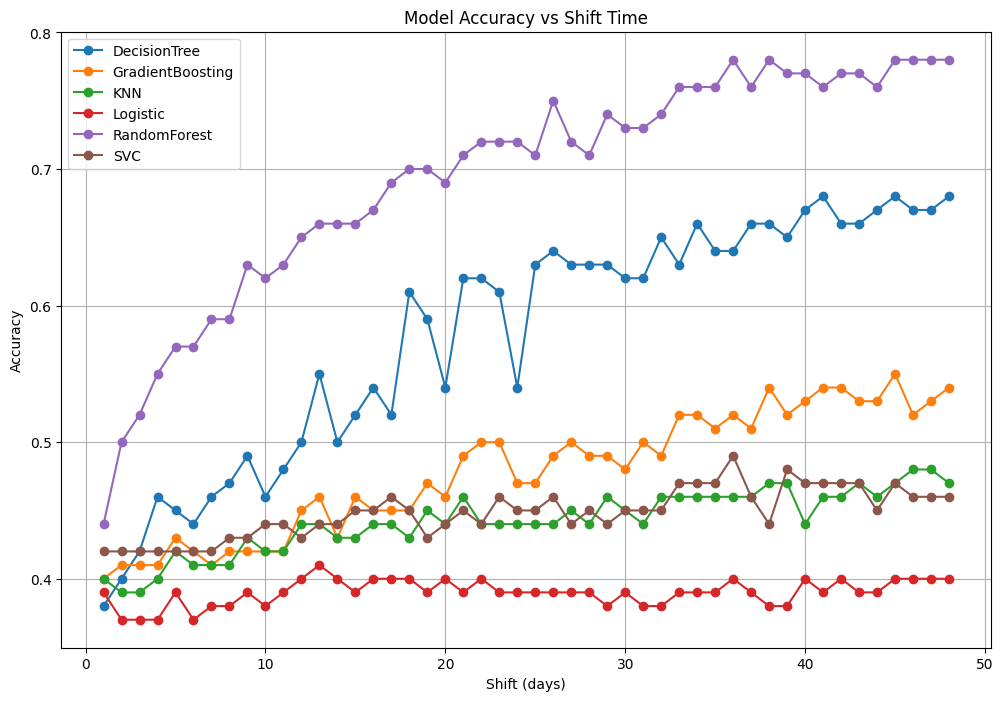

In [88]:

# Load the log file content
with open('training_log.txt', 'r') as file:
    log_string = file.read()

# Regular expressions to extract the necessary information
shift_pattern = re.compile(r"i = (\d+)")
accuracy_pattern = re.compile(r"accuracy\s+(\d\.\d+)")

# Model names and patterns
model_patterns = {
    "DecisionTree": re.compile(r"model_DecisionTree\s+[\s\S]*?accuracy\s+(\d\.\d+)"),
    "GradientBoosting": re.compile(r"model_GradientBoosting\s+[\s\S]*?accuracy\s+(\d\.\d+)"),
    "KNN": re.compile(r"model_KNN\s+[\s\S]*?accuracy\s+(\d\.\d+)"),
    "Logistic": re.compile(r"model_Logistic\s+[\s\S]*?accuracy\s+(\d\.\d+)"),
    "RandomForest": re.compile(r"model_RandomForest\s+[\s\S]*?accuracy\s+(\d\.\d+)"),
    "SVC": re.compile(r"model_SVC\s+[\s\S]*?accuracy\s+(\d\.\d+)")
}

# Data structure to store extracted accuracies
accuracy_data = {model: [] for model in model_patterns}
shift_values = []

# Extract shift values and accuracies
shift_matches = shift_pattern.findall(log_string)
shifted_sections = log_string.split("Now plotting")[1:]  # Split log by 'Now plotting' to isolate sections for each shift

for i, section in enumerate(shifted_sections):
    shift = int(shift_matches[i])
    shift_values.append(shift)
    for model, pattern in model_patterns.items():
        match = pattern.search(section)
        if match:
            accuracy = float(match.group(1))
            accuracy_data[model].append(accuracy)
        else:
            accuracy_data[model].append(None)

# Plotting
plt.figure(figsize=(12, 8))
for model, accuracies in accuracy_data.items():
    plt.plot(shift_values, accuracies, marker='o', label=model)

plt.xlabel('Shift (days)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Shift Time')
plt.legend()
plt.grid(True)
plt.show()